## **PREVISÃO DO CANCER DE MAMA**

---
Este projeto tem como objetivo, escolher o melhor algoritmo com base nas metricas estatisticas, para ter em retorno a resposta se o câncer é benigno ou
maligno.

https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data

In [3]:
# MANIPULAÇÃO E PLOTAGEM DOS DADOS
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import scipy.stats as sts
import matplotlib.pyplot as plt


# PRE-PROCESSAMENTO, METRICAS DE DESEMPENHO DOS MODELOS, SEPARAÇÃO DE TREINO E TESTE, OTIMIZAÇÃO DE HIPERPARAMETROS
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold, RandomizedSearchCV
from sklearn.pipeline import Pipeline 
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, minmax_scale, StandardScaler, LabelEncoder 
from sklearn.impute import SimpleImputer #
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score 

# ALGORTIMOS DE MACHINE LEARNING UTILIZADO NO PROJETO
from sklearn.naive_bayes import GaussianNB # NAIVE BAYES
from sklearn.svm import SVC # Maquina de vetor de suporte
from sklearn.linear_model import LogisticRegression # regressão logistica
from sklearn.neighbors import KNeighborsClassifier # KNN
from sklearn.tree import DecisionTreeClassifier # Arvore de decisão
from sklearn.ensemble import RandomForestClassifier # Random Forest
from xgboost import XGBClassifier # xgboost
from lightgbm import LGBMClassifier # lightgbm
from catboost import CatBoostClassifier # Catboost
#!pip install xgboost
#!pip install lightgbm
#!pip install catboost
from sklearn.neural_network import MLPClassifier #algoritmo de rede neural artificial

# EXPORTAR OS ALGORTIMOS EM ARQUIVOS PKL PARA USO POSTERIOR
import joblib

# AVISOS
import warnings #aviso
from logging import warning

In [5]:
#importação da base de dados
dados_cancer = pd.read_csv('../data/raw/dados_cancer.csv', sep = ',', encoding = 'iso-8859-1')
#exibição do dataframe
display(dados_cancer.head())
#tamanho do dataframe
dados_cancer.shape


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


(569, 33)

In [5]:
dados_cancer.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [6]:
#tipos das variaveis
dados_cancer.dtypes
#verificando a quantiade de variaveis nulas no conjunto para cada variavel.
dados_cancer.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

Alvo = diagnosis (object)

previsores = colunas 1 a 31 coluna (float64)

descartaveis = Unnamed: 32 e id (float64)


#**ANALISE DAS VARAIVEIS**
quantidade de valores, valores null, distribuição gráfica

**diagnosis**

M = Maligno - 212 - 37.3%

B = Benigno - 357 - 62.7%

In [7]:
#quantidade para cada classe
dados_cancer['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [8]:
#frequencia das classes
frequencia_diagnostico = px.histogram(dados_cancer, x = 'diagnosis', nbins = 60)
frequencia_diagnostico.update_layout(title = 'Distribuição das classes')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'bingroup': 'x',
              'hovertemplate': 'diagnosis=%{x}<br>count=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
              'name': '',
              'nbinsx': 60,
              'orientation': 'v',
              'showlegend': False,
              'type': 'histogram',
              'x': array(['M', 'M', 'M', ..., 'M', 'M', 'B'], shape=(569,), dtype=object),
              'xaxis': 'x',
              'yaxis': 'y'}],
    'layout': {'barmode': 'relative',
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'title': {'text': 'Distribuição das classes'},
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'diagnosis'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'count'}}}
})

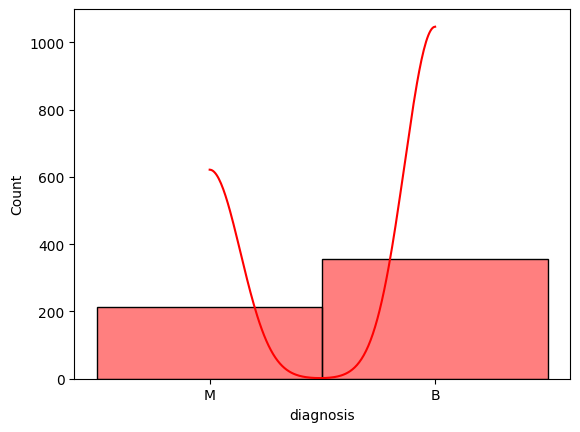

In [9]:
#curva normal para a frequencia de classes
frequencia_diagnostico_ = sns.histplot(dados_cancer, x = 'diagnosis', bins = 30, color= 'red', kde = True, stat = 'count')

In [10]:
#porcentagem de frequencia de cada classe
px.pie(dados_cancer, names= 'diagnosis')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'domain': {'x': [0.0, 1.0], 'y': [0.0, 1.0]},
              'hovertemplate': 'diagnosis=%{label}<extra></extra>',
              'labels': array(['M', 'M', 'M', ..., 'M', 'M', 'B'], shape=(569,), dtype=object),
              'legendgroup': '',
              'name': '',
              'showlegend': True,
              'type': 'pie'}],
    'layout': {'legend': {'tracegroupgap': 0}, 'margin': {'t': 60}, 'template': '...'}
})

**radius_mean**

Distribuição aproximadamente normal (Q-Q PLOT)

Apresentando um total de 14 outliers não tão dispersa entre os registros

In [11]:
#quantidade de cada valor
dados_cancer['radius_mean'].value_counts().sort_index()

radius_mean
6.981     1
7.691     1
7.729     1
7.760     1
8.196     1
         ..
25.220    1
25.730    1
27.220    1
27.420    1
28.110    1
Name: count, Length: 456, dtype: int64

<Axes: xlabel='radius_mean', ylabel='Count'>

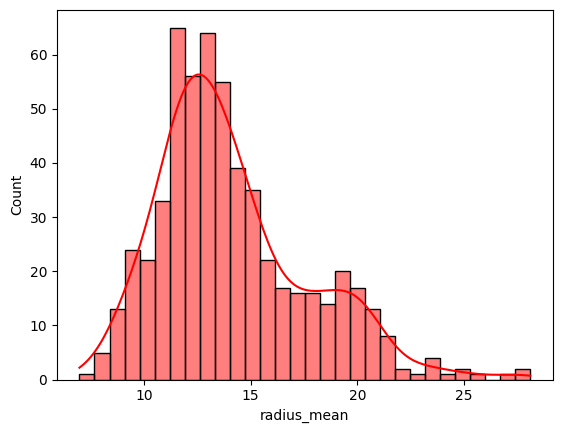

In [12]:
#frequencia dos valores
sns.histplot(dados_cancer, x = 'radius_mean', bins = 30, color = 'red', kde = True, stat = 'count' )


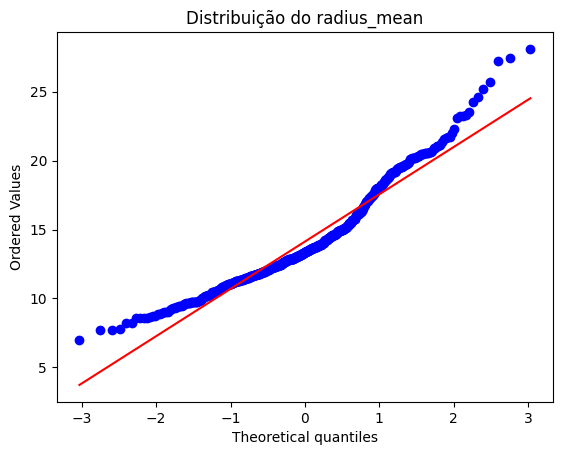

In [13]:
#distribuição dos registros.
sts.probplot(dados_cancer['radius_mean'],dist = 'norm', plot = plt)
#exibe o Q-Q PLOT e define o titlo
plt.title('Distribuição do radius_mean')
plt.show()

In [14]:
#outliers sobre os dados
px.box(dados_cancer, y = 'radius_mean')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'radius_mean=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa'},
              'name': '',
              'notched': False,
              'offsetgroup': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'box',
              'x0': ' ',
              'xaxis': 'x',
              'y': {'bdata': ('PQrXo3D9MUBSuB6F65E0QHE9CtejsD' ... 'mZmTBAmpmZmZmZNEAK16NwPQofQA=='),
                    'dtype': 'f8'},
              'y0': ' ',
              'yaxis': 'y'}],
    'layout': {'boxmode': 'group',
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0]},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'radius_mean'}}}
})

In [15]:
#um total de 14 outliers
outliers= dados_cancer[(dados_cancer['radius_mean'] > 21.75)]
outliers['radius_mean'].value_counts().sum()

np.int64(14)

In [16]:
#descrição estatistica da variavel
dados_cancer['radius_mean'].describe()

count    569.000000
mean      14.127292
std        3.524049
min        6.981000
25%       11.700000
50%       13.370000
75%       15.780000
max       28.110000
Name: radius_mean, dtype: float64

**texture_mean**

Distribuição Aparentemente Normal (Q-Q plot)

Um total de 7 outliers com pouca dispersão


In [17]:
#frequencia dos dados
dados_cancer['texture_mean'].value_counts().sort_index()

texture_mean
9.71     1
10.38    1
10.72    1
10.82    1
10.89    1
        ..
31.12    1
32.47    1
33.56    1
33.81    1
39.28    1
Name: count, Length: 479, dtype: int64

<Axes: xlabel='texture_mean', ylabel='Count'>

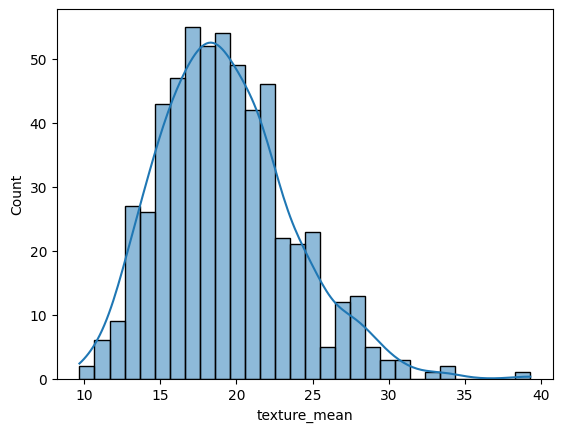

In [18]:
# analise de frequencia
sns.histplot(dados_cancer, x = 'texture_mean', bins = 30, kde = True, stat= 'count')

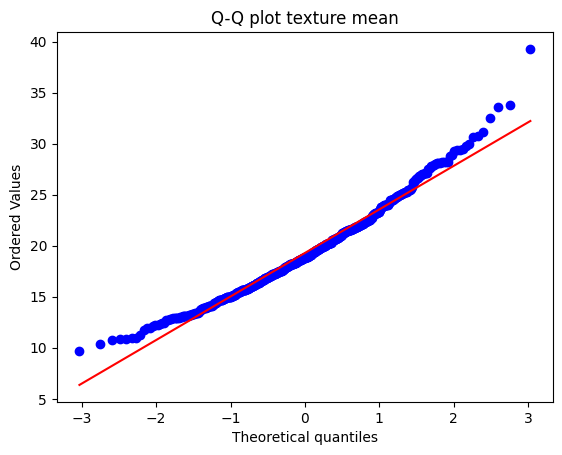

In [19]:
#Q-Q PLOT
sts.probplot(dados_cancer['texture_mean'], dist = 'norm', plot = plt)
plt.title('Q-Q plot texture mean')
plt.show()

In [20]:
#outliers
px.box(dados_cancer, y = 'texture_mean')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'texture_mean=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa'},
              'name': '',
              'notched': False,
              'offsetgroup': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'box',
              'x0': ' ',
              'xaxis': 'x',
              'y': {'bdata': ('w/UoXI/CJECF61G4HsUxQAAAAAAAQD' ... 'F6FDxAFK5H4XpUPUAK16NwPYo4QA=='),
                    'dtype': 'f8'},
              'y0': ' ',
              'yaxis': 'y'}],
    'layout': {'boxmode': 'group',
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0]},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'texture_mean'}}}
})

In [21]:
#quantidade de outliers
outliers = dados_cancer[dados_cancer['texture_mean'] >  29.97]
outliers['texture_mean'].value_counts().sum()

np.int64(7)

**perimeter_mean**

Distribuição aparetemente normal

13 outliers

In [22]:
dados_cancer['perimeter_mean'].value_counts().sort_index()

perimeter_mean
43.79     1
47.92     1
47.98     1
48.34     1
51.71     1
         ..
171.50    1
174.20    1
182.10    1
186.90    1
188.50    1
Name: count, Length: 522, dtype: int64

<Axes: xlabel='perimeter_mean', ylabel='Count'>

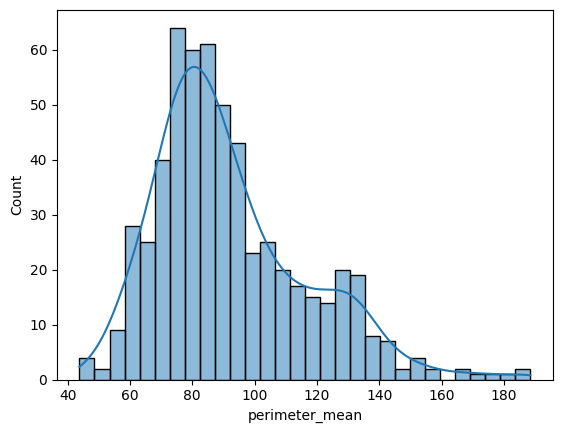

In [23]:
#
sns.histplot(dados_cancer, x= 'perimeter_mean', bins = 30 ,kde = True, stat = 'count')

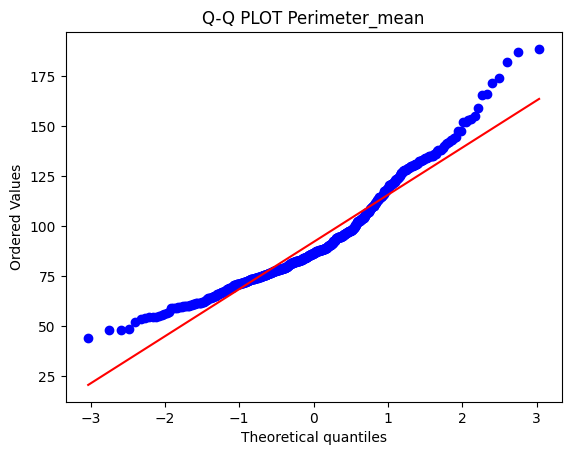

In [24]:
#qq plot
sts.probplot(dados_cancer['perimeter_mean'], dist = 'norm', plot = plt)
plt.title('Q-Q PLOT Perimeter_mean')
plt.show()

In [25]:
#outliers
px.box(dados_cancer, y = 'perimeter_mean')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'perimeter_mean=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa'},
              'name': '',
              'notched': False,
              'offsetgroup': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'box',
              'x0': ' ',
              'xaxis': 'x',
              'y': {'bdata': ('MzMzMzOzXkDNzMzMzJxgQAAAAAAAQG' ... 'MzE1tAMzMzMzODYUD2KFyPwvVHQA=='),
                    'dtype': 'f8'},
              'y0': ' ',
              'yaxis': 'y'}],
    'layout': {'boxmode': 'group',
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0]},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'perimeter_mean'}}}
})

In [26]:
#quantidade de outliers
outliers = dados_cancer[dados_cancer['perimeter_mean'] > 147.3]
outliers['perimeter_mean'].value_counts().sum()

np.int64(13)

In [27]:
dados_cancer['perimeter_mean'].describe()

count    569.000000
mean      91.969033
std       24.298981
min       43.790000
25%       75.170000
50%       86.240000
75%      104.100000
max      188.500000
Name: perimeter_mean, dtype: float64

**area_mean**

Aparentemente não segue uma distribuição normal

25 outliers com uma grande dispersão de dados na calda direita



In [28]:
#frequencias
dados_cancer['area_mean'].value_counts().sort_index()

area_mean
143.5     1
170.4     1
178.8     1
181.0     1
201.9     1
         ..
1878.0    1
2010.0    1
2250.0    1
2499.0    1
2501.0    1
Name: count, Length: 539, dtype: int64

<Axes: xlabel='area_mean', ylabel='Count'>

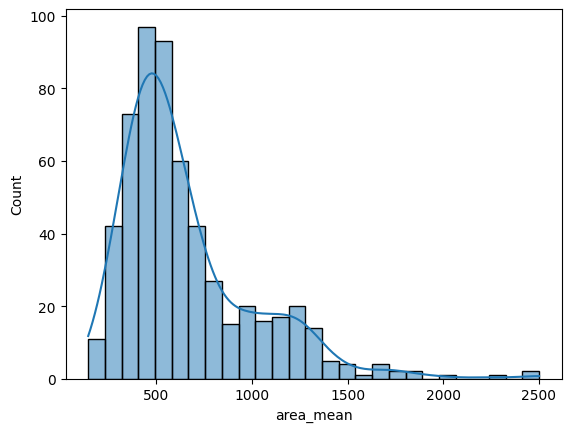

In [29]:
#frequencia dos dados e curva normal
sns.histplot(dados_cancer, x = 'area_mean', kde = True, stat = 'count')

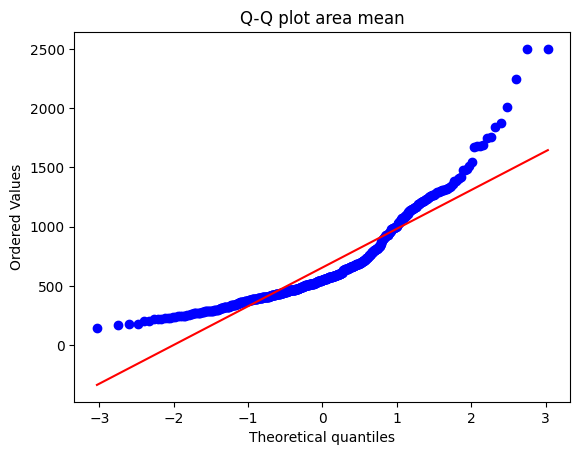

In [30]:
#Q-Q plot para variabilidade dos dados
sts.probplot(dados_cancer['area_mean'], dist = 'norm', plot = plt)
plt.title('Q-Q plot area mean')
plt.show()

In [31]:
#outliers
px.box(dados_cancer, y = 'area_mean')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'area_mean=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa'},
              'name': '',
              'notched': False,
              'offsetgroup': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'box',
              'x0': ' ',
              'xaxis': 'x',
              'y': {'bdata': ('AAAAAABIj0AAAAAAALiUQAAAAAAAzJ' ... 'zM0IpAAAAAAADEk0AAAAAAAKBmQA=='),
                    'dtype': 'f8'},
              'y0': ' ',
              'yaxis': 'y'}],
    'layout': {'boxmode': 'group',
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0]},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'area_mean'}}}
})

In [32]:
#quantidade de outliers
outliers = dados_cancer[dados_cancer['area_mean'] > 1326]
outliers['area_mean'].value_counts().sum()

np.int64(25)

In [33]:
#descrição estatistica dos dados
dados_cancer['area_mean'].describe()

count     569.000000
mean      654.889104
std       351.914129
min       143.500000
25%       420.300000
50%       551.100000
75%       782.700000
max      2501.000000
Name: area_mean, dtype: float64

**smoothness_mean**


uma provavel distribuição normal


6 outliers no total, 5 ácima do limite superior e 1 àbaixo do limite inferior

In [34]:
dados_cancer.smoothness_mean.value_counts().sort_index()

smoothness_mean
0.05263    1
0.06251    1
0.06429    1
0.06576    1
0.06613    1
          ..
0.13710    1
0.13980    1
0.14250    1
0.14470    1
0.16340    1
Name: count, Length: 474, dtype: int64

<Axes: xlabel='smoothness_mean', ylabel='Count'>

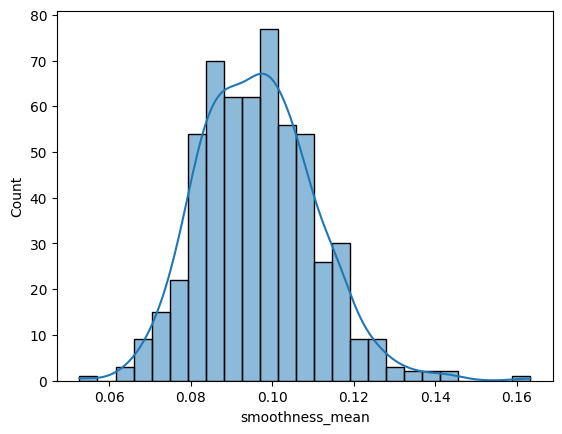

In [35]:
#
sns.histplot(dados_cancer, x = 'smoothness_mean', kde = True, stat = 'count')

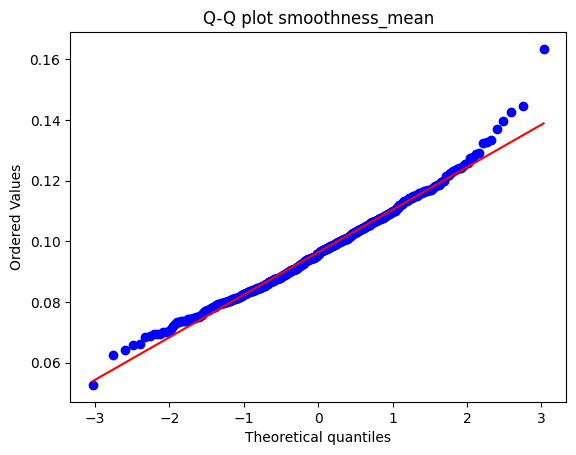

In [36]:
#distribuição dos dados
sts.probplot(dados_cancer['smoothness_mean'], dist = 'norm', plot = plt)
plt.title('Q-Q plot smoothness_mean')
plt.show()


In [37]:
#analisando outliers
px.box(dados_cancer, y = 'smoothness_mean')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'smoothness_mean=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa'},
              'name': '',
              'notched': False,
              'offsetgroup': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'box',
              'x0': ' ',
              'xaxis': 'x',
              'y': {'bdata': ('rK3YX3ZPvj/9vKlIhbG1P+Y/pN++Dr' ... 'wRpbU/RwN4CyQovj+ns5PBUfKqPw=='),
                    'dtype': 'f8'},
              'y0': ' ',
              'yaxis': 'y'}],
    'layout': {'boxmode': 'group',
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0]},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'smoothness_mean'}}}
})

In [38]:
# separando para contar
outliers = dados_cancer[(dados_cancer['smoothness_mean'] > 0.1335) | (dados_cancer['smoothness_mean'] < 0.06251)]
#outliers
outliers['smoothness_mean']
#quantidade de outliers
outliers['smoothness_mean'].value_counts().sum()

np.int64(6)

**compactness_mean**

Distribuição aparentemente normal

16 outliers com um variabilidade não tão grande

In [39]:
dados_cancer['compactness_mean'].value_counts().sort_index()

compactness_mean
0.01938    1
0.02344    1
0.02650    1
0.02675    1
0.03116    1
          ..
0.28320    1
0.28390    1
0.28670    1
0.31140    1
0.34540    1
Name: count, Length: 537, dtype: int64

<Axes: xlabel='compactness_mean', ylabel='Count'>

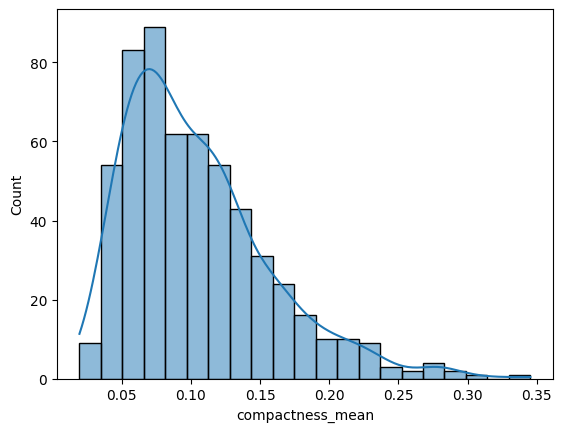

In [40]:
sns.histplot(dados_cancer, x = 'compactness_mean', kde = True, stat = 'count')

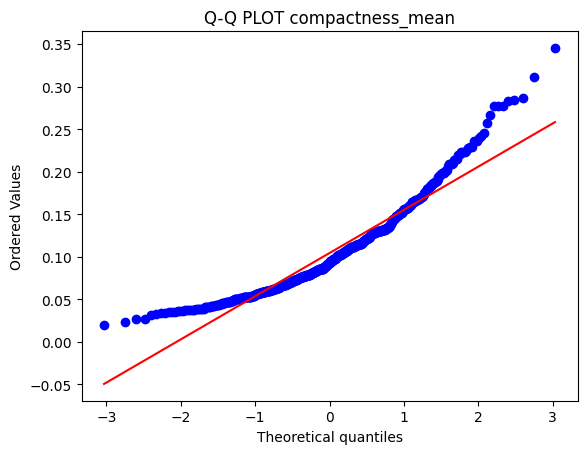

In [41]:
sts.probplot(dados_cancer['compactness_mean'], dist = 'norm', plot = plt)
plt.title('Q-Q PLOT compactness_mean')
plt.show()

In [42]:
px.box(dados_cancer, y = 'compactness_mean')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'compactness_mean=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa'},
              'name': '',
              'notched': False,
              'offsetgroup': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'box',
              'x0': ' ',
              'xaxis': 'x',
              'y': {'bdata': ('h6dXyjLE0T/9TShEwCG0P/KwUGuad8' ... 'JVMLo/7nw/NV660T+hLedSXFWmPw=='),
                    'dtype': 'f8'},
              'y0': ' ',
              'yaxis': 'y'}],
    'layout': {'boxmode': 'group',
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0]},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'compactness_mean'}}}
})

In [43]:
outliers = dados_cancer[dados_cancer['compactness_mean'] > 0.2284]
outliers['compactness_mean']
outliers['compactness_mean'].value_counts().sum()

np.int64(16)

**concavity_mean**

Distribuição aparentemente não normal

0 valores nulos

18 outliers ácima do limte superior, grande variabilidade de valor nos outliers

In [44]:
dados_cancer['concavity_mean'].value_counts().sort_index()


concavity_mean
0.000000    13
0.000692     1
0.000974     1
0.001194     1
0.001461     1
            ..
0.363500     1
0.375400     1
0.410800     1
0.426400     1
0.426800     1
Name: count, Length: 537, dtype: int64

In [45]:
print('quantidade de registros nulos: {}'.format(dados_cancer['concavity_mean'].isnull().sum()))

quantidade de registros nulos: 0


<Axes: xlabel='concavity_mean', ylabel='Count'>

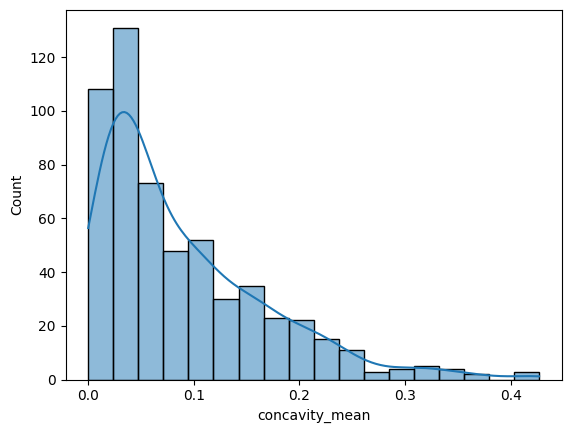

In [46]:
sns.histplot(dados_cancer,x = 'concavity_mean',kde = True, stat = 'count')

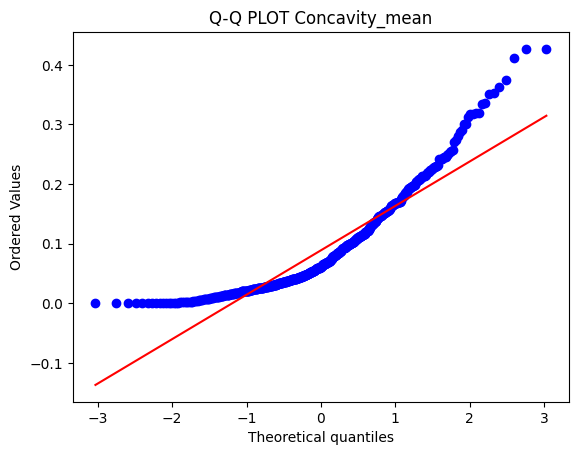

In [47]:
sts.probplot(dados_cancer['concavity_mean'], dist = 'norm', plot = plt)
plt.title('Q-Q PLOT Concavity_mean')
plt.show()

In [48]:
#analisando os outliers
px.box(dados_cancer, y ='concavity_mean')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'concavity_mean=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa'},
              'name': '',
              'notched': False,
              'offsetgroup': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'box',
              'x0': ' ',
              'xaxis': 'x',
              'y': {'bdata': ('9+RhodY00z8CvAUSFD+2P799HThnRM' ... 'C8rrc/IR/0bFZ91j8AAAAAAAAAAA=='),
                    'dtype': 'f8'},
              'y0': ' ',
              'yaxis': 'y'}],
    'layout': {'boxmode': 'group',
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0]},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'concavity_mean'}}}
})

In [49]:
#outliers, quantidade de outliers e os registros outliars
outliers = dados_cancer[dados_cancer['concavity_mean'] > 0.281]
outliers['concavity_mean']
outliers['concavity_mean'].value_counts().sum()



np.int64(18)

In [50]:
#metricas estatisticas
dados_cancer['concavity_mean'].describe()

count    569.000000
mean       0.088799
std        0.079720
min        0.000000
25%        0.029560
50%        0.061540
75%        0.130700
max        0.426800
Name: concavity_mean, dtype: float64

**concave points_mean**

Distribuição aparentemente não normal

total de 10 outliers com uma grande variabilidade no valor dos registros na extremidade direita

In [51]:
#frequencia dos valores
dados_cancer['concave points_mean'].value_counts()

concave points_mean
0.00000    13
0.02864     3
0.02272     2
0.14710     2
0.10430     2
           ..
0.14740     1
0.13890     1
0.09791     1
0.05302     1
0.07017     1
Name: count, Length: 542, dtype: int64

In [52]:
#verificando existencia de valores nulos
dados_cancer['concave points_mean'].isnull().sum()

np.int64(0)

<Axes: xlabel='concave points_mean', ylabel='Count'>

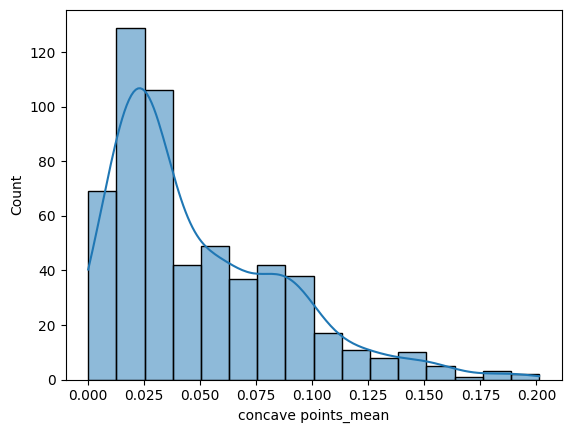

In [53]:
#histograma com curva normal
sns.histplot(dados_cancer, x = 'concave points_mean', kde = True, stat = 'count')

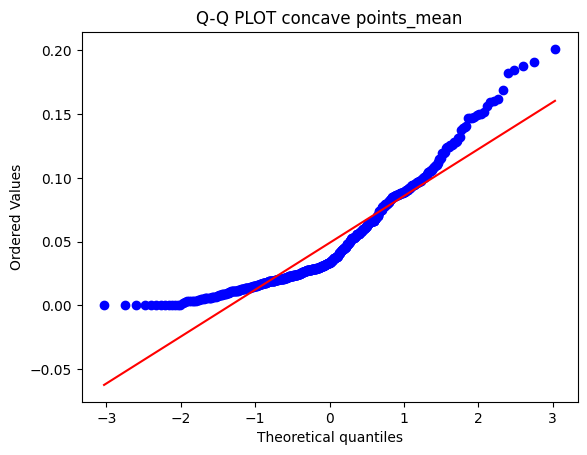

In [54]:
#Q-Q PLOT para analisar a possivel normalidade dos dados
sts.probplot(dados_cancer['concave points_mean'], dist = 'norm', plot = plt)
plt.title('Q-Q PLOT concave points_mean')
plt.show()


In [55]:
#analise de outliers
px.box(dados_cancer, y = 'concave points_mean')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'concave points_mean=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa'},
              'name': '',
              'notched': False,
              'offsetgroup': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'box',
              'x0': ' ',
              'xaxis': 'x',
              'y': {'bdata': ('wOyePCzUwj+7Cik/qfaxP3RGlPYGX8' ... 'xvJas/2/l+arx0wz8AAAAAAAAAAA=='),
                    'dtype': 'f8'},
              'y0': ' ',
              'yaxis': 'y'}],
    'layout': {'boxmode': 'group',
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0]},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'concave points_mean'}}}
})

In [56]:
#outliers presentes e sua quantidade
outliers = dados_cancer[dados_cancer['concave points_mean'] > 0.152]
outliers['concave points_mean']
outliers['concave points_mean'].value_counts().sum()


np.int64(10)

**Symmetry_Mean**

Grande probabilidade de seguir uma distribuição normal

15 outliers, 1 no limite inferior e 14 a cima limite superior, pouca variabilidade no valor dos registros, 0 valores nulos

In [57]:
#fraquencia dos valores
dados_cancer['symmetry_mean'].value_counts()

symmetry_mean
0.1769    4
0.1893    4
0.1717    4
0.1714    4
0.1601    4
         ..
0.1917    1
0.1819    1
0.1683    1
0.2303    1
0.1586    1
Name: count, Length: 432, dtype: int64

In [58]:
#buscando valores nulos na coluna
dados_cancer['symmetry_mean'].isnull().sum()

np.int64(0)

<Axes: xlabel='symmetry_mean', ylabel='Count'>

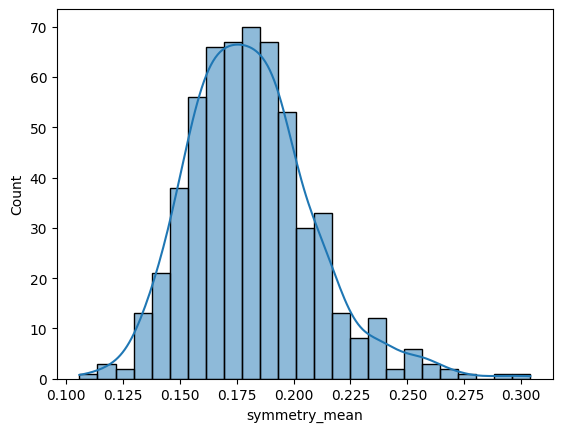

In [59]:
#histograma com curva normal
sns.histplot(dados_cancer, x = 'symmetry_mean', kde = True, stat = 'count')

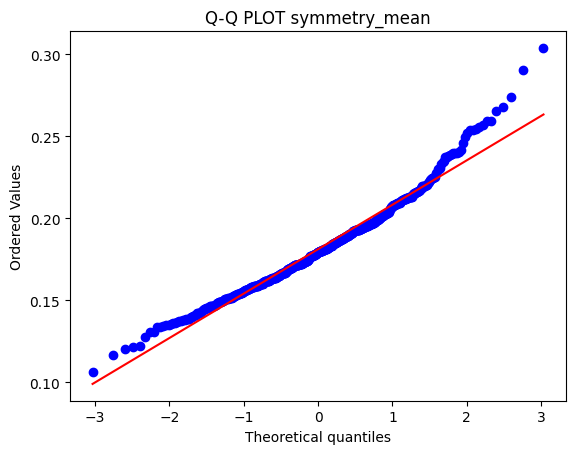

In [60]:
#Q-Q PLOT
sts.probplot(dados_cancer['symmetry_mean'], dist= 'norm', plot = plt)
plt.title('Q-Q PLOT symmetry_mean')
plt.show()

In [61]:
px.box(dados_cancer, y = 'symmetry_mean')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'symmetry_mean=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa'},
              'name': '',
              'notched': False,
              'offsetgroup': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'box',
              'x0': ' ',
              'xaxis': 'x',
              'y': {'bdata': ('2IFzRpT2zj9vgQTFjzHHP11txf6ye8' ... 'wcWsQ/H/RsVn2uzj+OBvAWSFDEPw=='),
                    'dtype': 'f8'},
              'y0': ' ',
              'yaxis': 'y'}],
    'layout': {'boxmode': 'group',
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0]},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'symmetry_mean'}}}
})

In [62]:
#outliers e quantidade
outliers = dados_cancer[(dados_cancer['symmetry_mean'] > 0.2459) | (dados_cancer['symmetry_mean'] < 0.1167)]
outliers['symmetry_mean']
outliers['symmetry_mean'].value_counts().sum()


np.int64(15)

**fractal_dimension_mean**

Distribuição aparentemente normal

10 outliers para o limite superior pouca variabilidade no valor dos registros

In [63]:
#frequencia dos registros
dados_cancer.fractal_dimension_mean.value_counts().sort_values()

fractal_dimension_mean
0.07356    1
0.05648    1
0.07016    1
0.09744    1
0.06149    1
          ..
0.06113    3
0.05907    3
0.05667    3
0.05913    3
0.06782    3
Name: count, Length: 499, dtype: int64

In [64]:
#valores nulos
dados_cancer.fractal_dimension_mean.isnull().sum()

np.int64(0)

<Axes: xlabel='fractal_dimension_mean', ylabel='Count'>

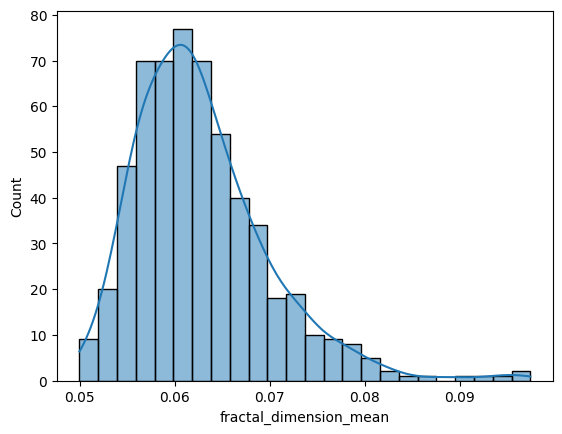

In [65]:
#histograma com curva normal
sns.histplot(dados_cancer, x='fractal_dimension_mean', kde = True, stat = 'count')

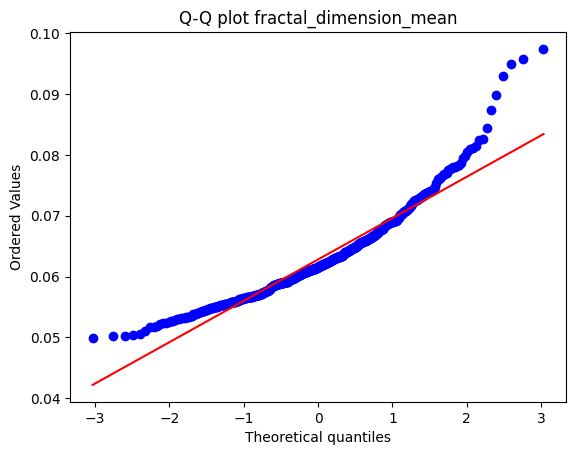

In [66]:
#Q-Q plot para analisar a distribuição do dados com relação a reta
sts.probplot(dados_cancer.fractal_dimension_mean, dist = 'norm', plot = plt)
plt.title('Q-Q plot fractal_dimension_mean')
plt.show()

In [67]:
#outliers
px.box(dados_cancer,  y = 'fractal_dimension_mean')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'fractal_dimension_mean=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa'},
              'name': '',
              'notched': False,
              'offsetgroup': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'box',
              'x0': ' ',
              'xaxis': 'x',
              'y': {'bdata': ('vD/eq1YmtD/AIVSp2QOtP4KQLGACt6' ... 'Hy6qw/oMN8eQH2sT8ArmTHRiCuPw=='),
                    'dtype': 'f8'},
              'y0': ' ',
              'yaxis': 'y'}],
    'layout': {'boxmode': 'group',
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0]},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'fractal_dimension_mean'}}}
})

In [68]:
#outliers e soma de outliers
outliers = dados_cancer[dados_cancer['fractal_dimension_mean'] > 0.07871]
outliers.fractal_dimension_mean
outliers.fractal_dimension_mean.value_counts().sum()

np.int64(15)

**radius mean**

Distribuição aparentemente normal

14 outliers no limite superior, pouca variabilidade nos valores dos registros, 0 valores nulos

In [69]:
#frequencia dos registos
dados_cancer['radius_mean'].value_counts().sort_index()

radius_mean
6.981     1
7.691     1
7.729     1
7.760     1
8.196     1
         ..
25.220    1
25.730    1
27.220    1
27.420    1
28.110    1
Name: count, Length: 456, dtype: int64

In [70]:
#valores missing
dados_cancer['radius_mean'].isnull().sum()

np.int64(0)

<Axes: xlabel='radius_mean', ylabel='Count'>

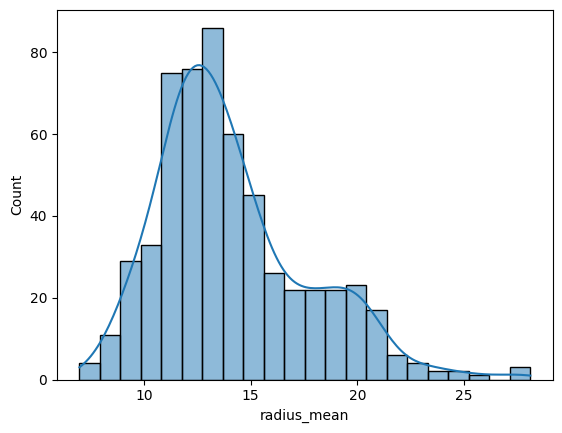

In [71]:
sns.histplot(dados_cancer, x = 'radius_mean', kde = True, stat = 'count')

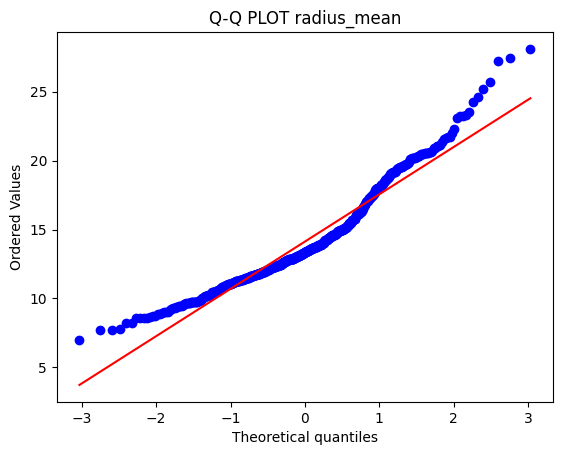

In [72]:
sts.probplot(dados_cancer['radius_mean'], dist = 'norm', plot = plt)
plt.title('Q-Q PLOT radius_mean')
plt.show()

In [73]:
px.box(dados_cancer, y = 'radius_mean')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'radius_mean=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa'},
              'name': '',
              'notched': False,
              'offsetgroup': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'box',
              'x0': ' ',
              'xaxis': 'x',
              'y': {'bdata': ('PQrXo3D9MUBSuB6F65E0QHE9CtejsD' ... 'mZmTBAmpmZmZmZNEAK16NwPQofQA=='),
                    'dtype': 'f8'},
              'y0': ' ',
              'yaxis': 'y'}],
    'layout': {'boxmode': 'group',
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0]},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'radius_mean'}}}
})

In [74]:
outliers = dados_cancer[dados_cancer['radius_mean'] > 21.75]
outliers.radius_mean
outliers.radius_mean.value_counts().sum()

np.int64(14)

**texture_se**

Distribuição aproximadamento normal

20 outliers no limite superior, variabilidade do valor nos registros não tão alta, 0 valores missing

In [75]:
#frequencia dos valores
dados_cancer['texture_se'].value_counts().sort_index()

texture_se
0.3602    1
0.3621    1
0.3628    1
0.3871    1
0.3981    1
         ..
3.1200    1
3.5680    1
3.6470    1
3.8960    1
4.8850    1
Name: count, Length: 519, dtype: int64

In [76]:
#valores missing
dados_cancer.texture_se.isnull().sum()

np.int64(0)

<Axes: xlabel='texture_se', ylabel='Count'>

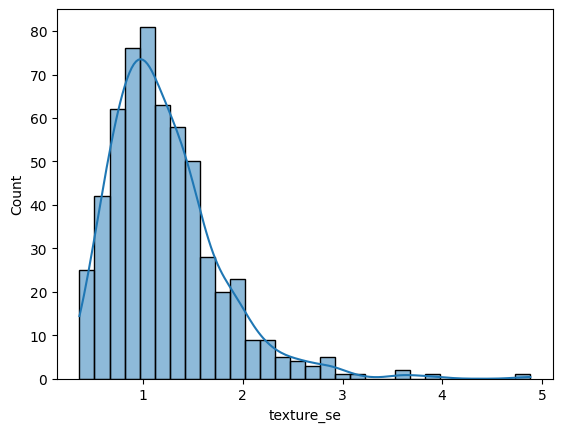

In [77]:
sns.histplot(dados_cancer, x = 'texture_se', kde = True, stat = 'count')

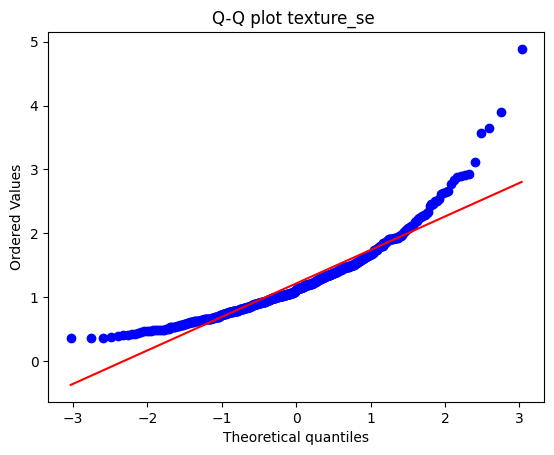

In [78]:
sts.probplot(dados_cancer['texture_se'], dist = 'norm', plot = plt)
plt.title('Q-Q plot texture_se ')
plt.show()

In [79]:
px.box(dados_cancer, y = 'texture_se')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'texture_se=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa'},
              'name': '',
              'notched': False,
              'offsetgroup': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'box',
              'x0': ' ',
              'xaxis': 'x',
              'y': {'bdata': ('nDOitDf47D/OGVHaG3znP+cdp+hILu' ... 'MzM/E/hetRuB6F+T8MAiuHFtn2Pw=='),
                    'dtype': 'f8'},
              'y0': ' ',
              'yaxis': 'y'}],
    'layout': {'boxmode': 'group',
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0]},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'texture_se'}}}
})

In [80]:
outliers = dados_cancer[dados_cancer['texture_se'] > 2.426]
outliers.texture_se
outliers.texture_se.value_counts().sum()

np.int64(20)

**parimeter_se**
Aparentemente não segue uma distribuição normal

38 outliers acima do limite superior, com uma grande variabilidade no valor do registros, uma grande cauda a direita

In [81]:
#
dados_cancer['perimeter_se'].value_counts()

perimeter_se
1.778    4
1.143    2
2.041    2
2.410    2
2.097    2
        ..
7.673    1
5.203    1
3.425    1
5.772    1
3.445    1
Name: count, Length: 533, dtype: int64

In [82]:
#checando valroes nulos
dados_cancer['perimeter_se'].isnull().sum()

np.int64(0)

<Axes: xlabel='perimeter_se', ylabel='Count'>

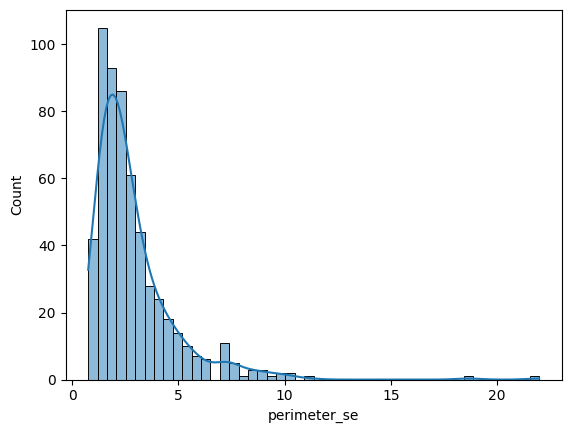

In [83]:
#histograma com curva normal
sns.histplot(dados_cancer,x = 'perimeter_se', kde = True, stat = 'count')


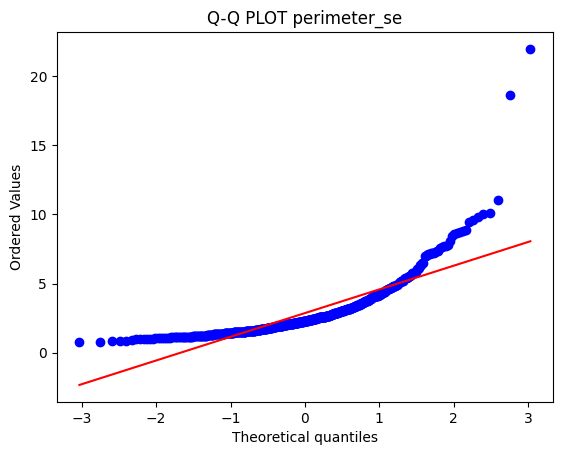

In [84]:
#QQ plot
sts.probplot(dados_cancer['perimeter_se'], dist = 'norm', plot = plt)
plt.title('Q-Q PLOT perimeter_se')
plt.show()

In [85]:
px.box(dados_cancer, y = 'perimeter_se')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'perimeter_se=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa'},
              'name': '',
              'notched': False,
              'offsetgroup': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'box',
              'x0': ' ',
              'xaxis': 'x',
              'y': {'bdata': ('IbByaJEtIUDJdr6fGi8LQNejcD0KVx' ... 'ZmZgtASgwCK4cWF0D8qfHSTWIEQA=='),
                    'dtype': 'f8'},
              'y0': ' ',
              'yaxis': 'y'}],
    'layout': {'boxmode': 'group',
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0]},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'perimeter_se'}}}
})

In [86]:
outliers = dados_cancer[dados_cancer['perimeter_se'] > 5.865]
outliers.perimeter_se
outliers.perimeter_se.value_counts().sum()

np.int64(38)

In [87]:
dados_cancer.perimeter_se.describe()

count    569.000000
mean       2.866059
std        2.021855
min        0.757000
25%        1.606000
50%        2.287000
75%        3.357000
max       21.980000
Name: perimeter_se, dtype: float64

**area_se**

Aparentemente segue uma distribuição não normal

contendo 64 outliers no limite superior, uma grande variabilidade no valor do limite superior até o ultimo outlier, 0 valores nulos.

In [88]:
#frequencia
dados_cancer['area_se'].value_counts().sort_values()

area_se
17.47    1
20.04    1
12.58    1
12.30    1
32.52    1
        ..
17.85    2
16.64    3
17.67    3
18.54    3
16.97    3
Name: count, Length: 528, dtype: int64

In [89]:
#checando valores nulos
dados_cancer['area_se'].isnull().sum()

np.int64(0)

<Axes: xlabel='area_se', ylabel='Count'>

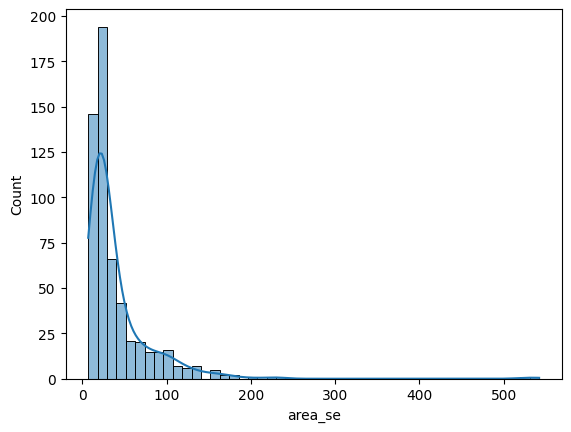

In [90]:
#histograma com curva normal
sns.histplot(dados_cancer,x = 'area_se', kde = True, stat = 'count')

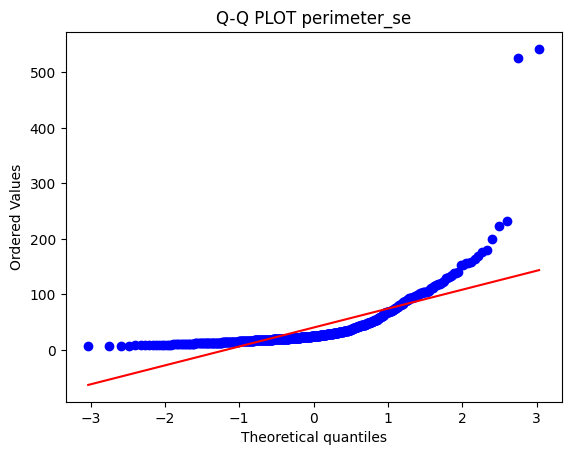

In [91]:
#QQ plot
sts.probplot(dados_cancer['area_se'], dist = 'norm', plot = plt)
plt.title('Q-Q PLOT perimeter_se')
plt.show()

In [92]:
px.box(dados_cancer, y = 'area_se')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'area_se=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa'},
              'name': '',
              'notched': False,
              'offsetgroup': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'box',
              'x0': ' ',
              'xaxis': 'x',
              'y': {'bdata': ('zczMzMwsY0CF61G4HoVSQFK4HoXrgV' ... 'ZmRkhArkfhehSOVUBmZmZmZiYzQA=='),
                    'dtype': 'f8'},
              'y0': ' ',
              'yaxis': 'y'}],
    'layout': {'boxmode': 'group',
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0]},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'area_se'}}}
})

In [93]:
outliers = dados_cancer[dados_cancer['area_se'] > 86.22]
outliers.area_se
outliers.area_se.value_counts().sum()

np.int64(64)

**smoothness_se**

Aparentemente segue uma distribuição normal

com 29 outliers no limite superior, uma baixa variabilidade nos valores do registros e 0 valores nulos.

In [94]:
#frequencia
dados_cancer.smoothness_se.value_counts().sort_values()

smoothness_se
0.008268    1
0.005731    1
0.008805    1
0.004314    1
0.007510    1
           ..
0.010520    2
0.007514    2
0.006494    2
0.006399    2
0.005910    2
Name: count, Length: 547, dtype: int64

In [95]:
#checando valores nulos
dados_cancer['smoothness_se'].isnull().sum()

np.int64(0)

<Axes: xlabel='smoothness_se', ylabel='Count'>

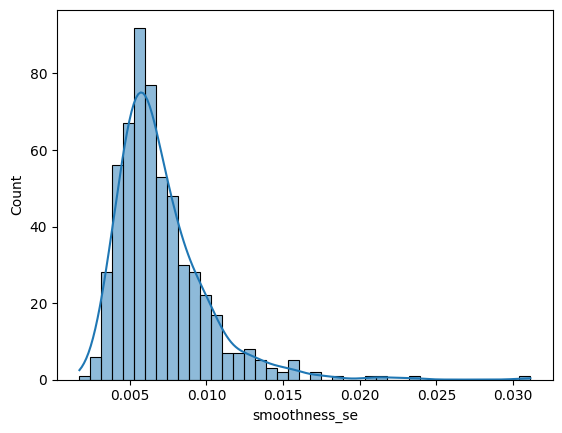

In [96]:
#histograma com curva normal
sns.histplot(dados_cancer,x = 'smoothness_se', kde = True, stat = 'count')

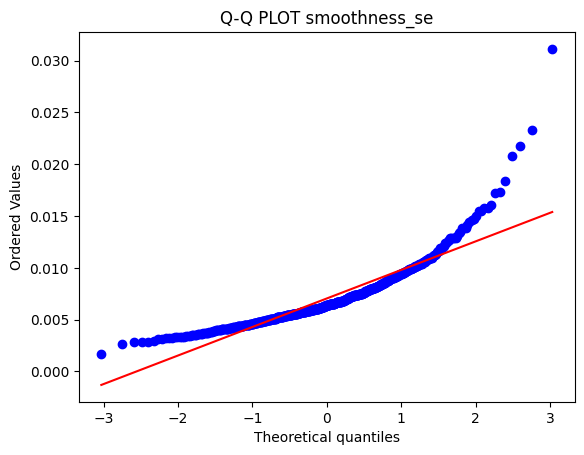

In [97]:
#QQ plot
sts.probplot(dados_cancer['smoothness_se'], dist = 'norm', plot = plt)
plt.title('Q-Q PLOT smoothness_se')
plt.show()

In [98]:
px.box(dados_cancer, y = 'smoothness_se')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'smoothness_se=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa'},
              'name': '',
              'notched': False,
              'offsetgroup': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'box',
              'x0': ' ',
              'xaxis': 'x',
              'y': {'bdata': ('zjeie9Y1ej/XEvJBz2Z1P40o7Q2+MH' ... '++LXg/YK5FC9C2ej9/TkF+NnJ9Pw=='),
                    'dtype': 'f8'},
              'y0': ' ',
              'yaxis': 'y'}],
    'layout': {'boxmode': 'group',
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0]},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'smoothness_se'}}}
})

In [99]:
outliers = dados_cancer[dados_cancer['smoothness_se'] > 0.01262]
outliers.smoothness_se
outliers.smoothness_se.value_counts().sum()

np.int64(29)

In [100]:
dados_cancer['smoothness_se'].describe()

count    569.000000
mean       0.007041
std        0.003003
min        0.001713
25%        0.005169
50%        0.006380
75%        0.008146
max        0.031130
Name: smoothness_se, dtype: float64

**compactness_se**

Distribuição não aparente seguir normalidade, com uma cauda muito grande para a direita

28 outliers para o limite superior, com uma grande variabilidade entre o valor dos registros.

In [101]:
#frequencia dos valores
dados_cancer['compactness_se'].value_counts().sort_values()

compactness_se
0.049040    1
0.021720    1
0.020990    1
0.007247    1
0.030840    1
           ..
0.013710    2
0.016460    2
0.011040    3
0.023100    3
0.018120    3
Name: count, Length: 541, dtype: int64

In [102]:
#quantidade de valores nulos
dados_cancer['compactness_se'].isnull().sum()

np.int64(0)

<Axes: xlabel='compactness_se', ylabel='Count'>

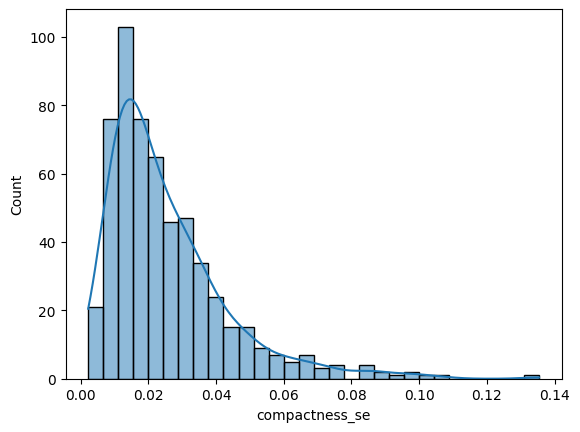

In [103]:
#histograma com curva de normalidade
sns.histplot(dados_cancer,x = 'compactness_se', kde = True,bins = 30,stat = 'count')

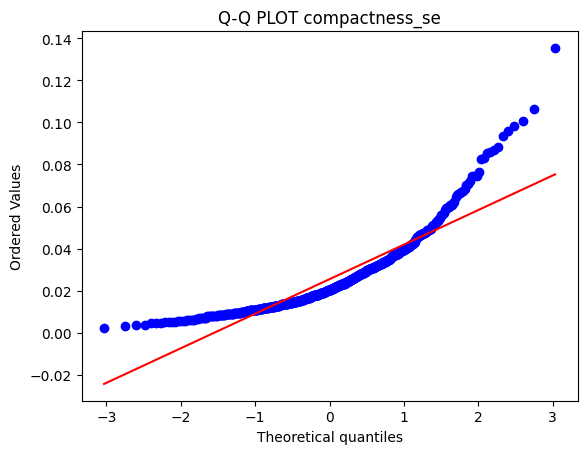

In [104]:
#Q-Q plot
sts.probplot(dados_cancer['compactness_se'], dist = 'norm', plot = plt)
plt.title('Q-Q PLOT compactness_se')
plt.show()

In [105]:
#outliers e quartis
px.box(dados_cancer, y = 'compactness_se')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'compactness_se=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa'},
              'name': '',
              'notched': False,
              'offsetgroup': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'box',
              'x0': ' ',
              'xaxis': 'x',
              'y': {'bdata': ('JEVkWMUbqT8Le9rhr8mKP8JpwYu+gq' ... 'tLGqM/ZeQs7GmHrz+D+pY5XRZzPw=='),
                    'dtype': 'f8'},
              'y0': ' ',
              'yaxis': 'y'}],
    'layout': {'boxmode': 'group',
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0]},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'compactness_se'}}}
})

In [106]:
outliers = dados_cancer[dados_cancer['compactness_se']> 0.06063]
outliers.compactness_se
outliers.compactness_se.value_counts().sum()

np.int64(28)

**concavity_se**
Distribuição aparentemente normal, cauda grade a direita

22 outliers para o limite superior, com uma variabilidade baixa na dispersão dos dados

In [107]:
#frequencia
dados_cancer['concavity_se'].value_counts().sort_index()

concavity_se
0.000000    13
0.000692     1
0.000793     1
0.000974     1
0.001128     1
            ..
0.143500     1
0.143800     1
0.153500     1
0.303800     1
0.396000     1
Name: count, Length: 533, dtype: int64

In [108]:
#valores nulos
dados_cancer['concavity_se'].isnull().sum()

np.int64(0)

<Axes: xlabel='concavity_se', ylabel='Count'>

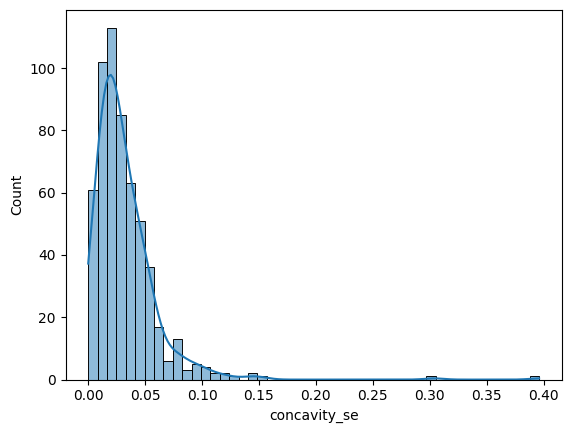

In [109]:
#hsitograma com curva normal
sns.histplot(dados_cancer, x = 'concavity_se', kde = True, stat = 'count')

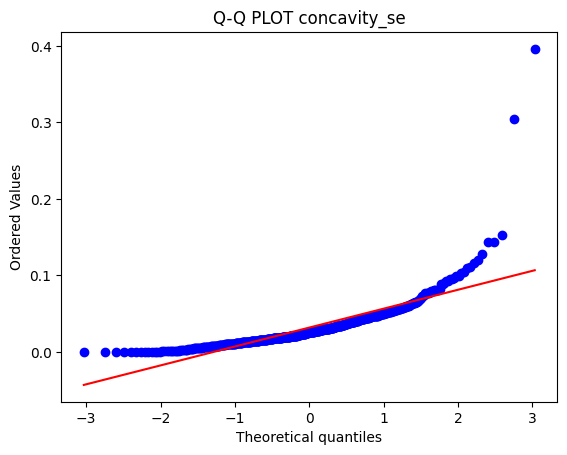

In [110]:
#QQ PLOT
sts.probplot(dados_cancer['concavity_se'], dist = 'norm', plot = plt)
plt.title('Q-Q PLOT concavity_se')
plt.show()

In [111]:
#box plot par aos outliers
px.box(dados_cancer, y = 'concavity_se')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'concavity_se=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa'},
              'name': '',
              'notched': False,
              'offsetgroup': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'box',
              'x0': ' ',
              'xaxis': 'x',
              'y': {'bdata': ('GM+goX+Cqz/OiNLe4AuTP63AkNWtnq' ... 'K0N6g/Y9F0djI4sj8AAAAAAAAAAA=='),
                    'dtype': 'f8'},
              'y0': ' ',
              'yaxis': 'y'}],
    'layout': {'boxmode': 'group',
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0]},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'concavity_se'}}}
})

In [112]:
#outliers
outliers = dados_cancer[dados_cancer['concavity_se'] > 0.08232]
outliers.concavity_se
outliers.concavity_se.value_counts().sum()

np.int64(22)

**concave points_se**

Distribuição aparentemente normal, unicaldal a direita

18 outliers para o limite superior e pouca variabilidade na dispersão dos dados

In [113]:
#frequencia
dados_cancer['concave points_se'].value_counts().sort_index()

concave points_se
0.000000    13
0.001852     1
0.002386     1
0.002404     1
0.002924     1
            ..
0.034410     1
0.034870     1
0.039270     1
0.040900     1
0.052790     1
Name: count, Length: 507, dtype: int64

In [114]:
#valores nulos
dados_cancer['concave points_se'].isnull().sum()

np.int64(0)

<Axes: xlabel='concave points_se', ylabel='Count'>

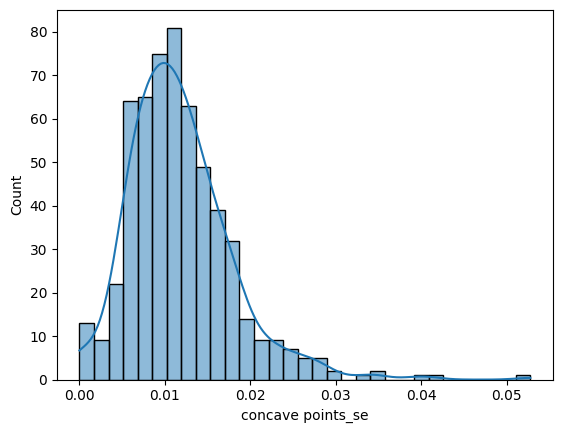

In [115]:
#histograma com curva normal
sns.histplot(dados_cancer, x = 'concave points_se', kde = True, stat = 'count')

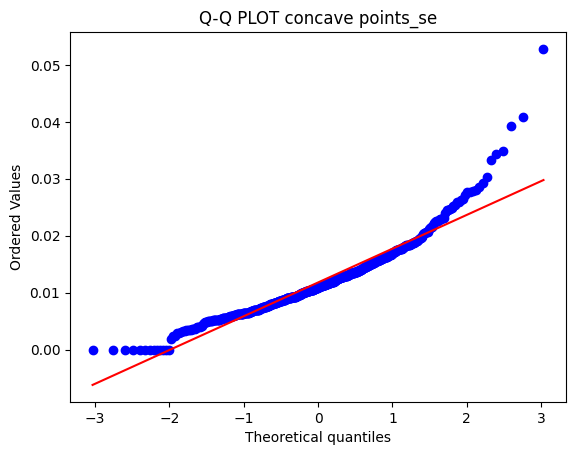

In [116]:
#QQ PLOT
sts.probplot(dados_cancer['concave points_se'], dist = 'norm', plot = plt)
plt.title('Q-Q PLOT concave points_se')
plt.show()

In [117]:
#box plot par aos outliers
px.box(dados_cancer, y = 'concave points_se')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'concave points_se=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa'},
              'name': '',
              'notched': False,
              'offsetgroup': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'box',
              'x0': ' ',
              'xaxis': 'x',
              'y': {'bdata': ('cTjzqzlAkD9TliGOdXGLPzSFzmvsEp' ... 'Yq448/Q8U4fxMKkT8AAAAAAAAAAA=='),
                    'dtype': 'f8'},
              'y0': ' ',
              'yaxis': 'y'}],
    'layout': {'boxmode': 'group',
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0]},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'concave points_se'}}}
})

In [118]:
#outliers
outliers = dados_cancer[dados_cancer['concave points_se'] > 0.02536]
outliers['concave points_se']
outliers['concave points_se'].value_counts().sum()

np.int64(18)

**symmetry_se**

Acredito que não siga uma distribuição normal, 0 valores nulos

27 outliers para o limite superior, variabilidade não muito alta para a dispersão dos dados

In [119]:
#frequencia
dados_cancer['symmetry_se'].value_counts().sort_index()

symmetry_se
0.007882    1
0.009539    1
0.009947    1
0.010130    1
0.010290    1
           ..
0.055430    1
0.056280    1
0.059630    1
0.061460    1
0.078950    1
Name: count, Length: 498, dtype: int64

In [120]:
#valores nulos
dados_cancer['symmetry_se'].isnull().sum()

np.int64(0)

<Axes: xlabel='symmetry_se', ylabel='Count'>

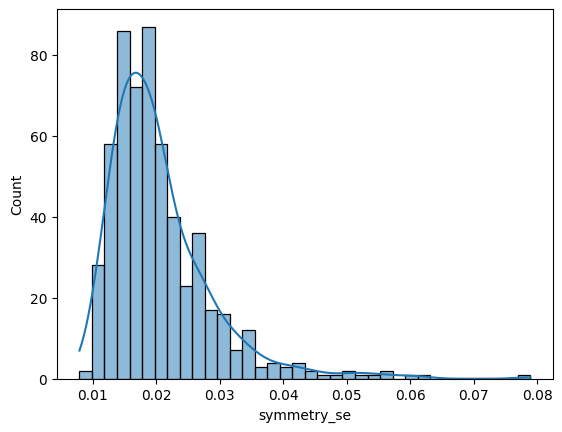

In [121]:
#histograma com curva normal
sns.histplot(dados_cancer, x = 'symmetry_se', kde = True, stat = 'count')

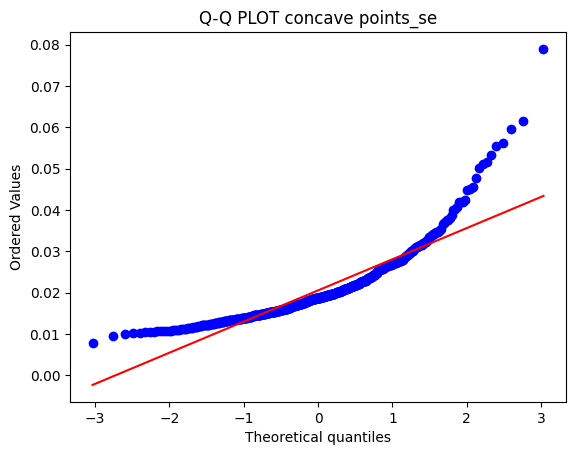

In [122]:
#QQ PLOT
sts.probplot(dados_cancer['symmetry_se'], dist = 'norm', plot = plt)
plt.title('Q-Q PLOT concave points_se')
plt.show()

In [123]:
#box plot par aos outliers
px.box(dados_cancer, y = 'symmetry_se')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'symmetry_se=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa'},
              'name': '',
              'notched': False,
              'offsetgroup': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'box',
              'x0': ' ',
              'xaxis': 'x',
              'y': {'bdata': ('AHSYLy/Anj8YeO49XHKMPwrXo3A9Cp' ... 'cd/oo/lQ7W/znMlz+eJF0z+WabPw=='),
                    'dtype': 'f8'},
              'y0': ' ',
              'yaxis': 'y'}],
    'layout': {'boxmode': 'group',
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0]},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'symmetry_se'}}}
})

In [124]:
#outliers
outliers = dados_cancer[dados_cancer['symmetry_se'] > 0.03546]
outliers['symmetry_se']
outliers['symmetry_se'].value_counts().sum()

np.int64(27)

**fractal_dimension_se**

Distribuição aparentemente normal, 0 valores nulos

28 outliers para o limite superior, pouca variabilidade na dispersão do dados

In [125]:
#frequencia de valores
dados_cancer['fractal_dimension_se'].value_counts().sort_values()

fractal_dimension_se
0.006193    1
0.001343    1
0.003599    1
0.002583    1
0.002606    1
           ..
0.002701    2
0.004005    2
0.003563    2
0.003224    2
0.005667    2
Name: count, Length: 545, dtype: int64

In [126]:
#valores nulos
dados_cancer['fractal_dimension_se'].isnull().sum()

np.int64(0)

<Axes: xlabel='fractal_dimension_se', ylabel='Count'>

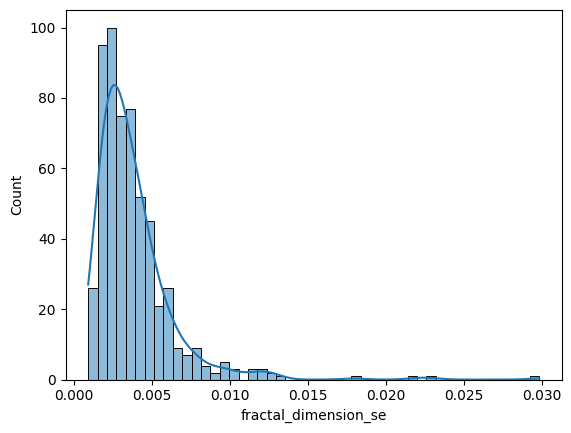

In [127]:
#histograma com curva normal
sns.histplot(dados_cancer, x = 'fractal_dimension_se', kde = True, stat = 'count')

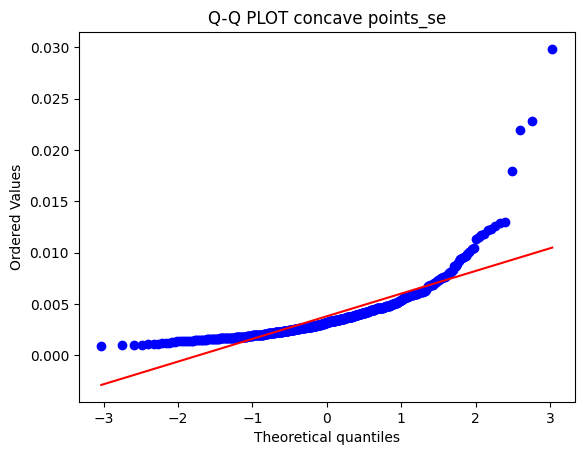

In [128]:
#QQ PLOT
sts.probplot(dados_cancer['fractal_dimension_se'], dist = 'norm', plot = plt)
plt.title('Q-Q PLOT concave points_se')
plt.show()

In [129]:
#box plot par aos outliers
px.box(dados_cancer, y = 'fractal_dimension_se')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'fractal_dimension_se=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa'},
              'name': '',
              'notched': False,
              'offsetgroup': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'box',
              'x0': ' ',
              'xaxis': 'x',
              'y': {'bdata': ('exFtx9RdeT8vwakPJO9sP4oGKXgKuX' ... 'Yd4m8/hbacS3FVeT8uOIO/X8xmPw=='),
                    'dtype': 'f8'},
              'y0': ' ',
              'yaxis': 'y'}],
    'layout': {'boxmode': 'group',
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0]},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'fractal_dimension_se'}}}
})

In [130]:
#outliers
outliers = dados_cancer[dados_cancer['fractal_dimension_se'] > 0.008015]
outliers['fractal_dimension_se']
outliers['fractal_dimension_se'].value_counts().sum()

np.int64(28)

**radius_worst**

Distribuição aparentemente normal, 0 valores nulos

28 outliers para o limite superior, pouca variabilidade na dispersão dos dados

In [131]:
#frequencia de valores
dados_cancer['radius_worst'].value_counts().sort_values()

radius_worst
17.52    1
15.61    1
12.45    1
17.11    1
17.32    1
        ..
14.91    3
11.92    3
13.50    4
13.34    4
12.36    5
Name: count, Length: 457, dtype: int64

In [132]:
#valores nulos
dados_cancer['radius_worst'].isnull().sum()

np.int64(0)

<Axes: xlabel='radius_worst', ylabel='Count'>

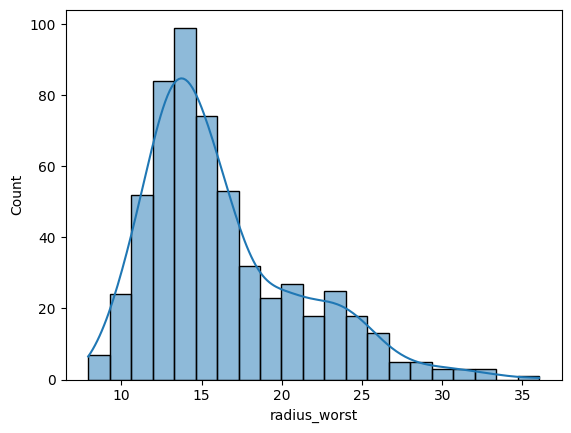

In [133]:
#histograma com curva normal
sns.histplot(dados_cancer, x = 'radius_worst', kde = True, stat = 'count')

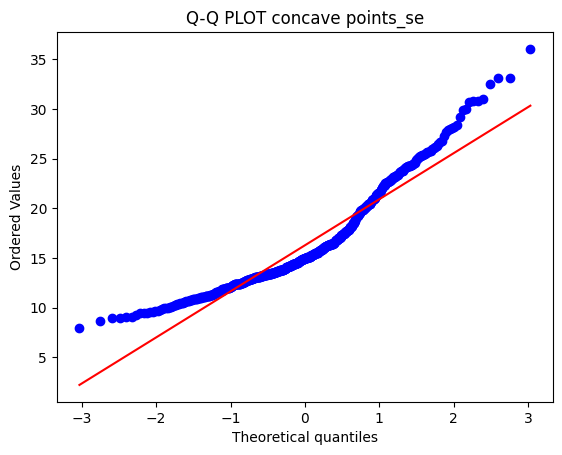

In [134]:
#QQ PLOT
sts.probplot(dados_cancer['radius_worst'], dist = 'norm', plot = plt)
plt.title('Q-Q PLOT concave points_se')
plt.show()

In [135]:
#box plot par aos outliers
px.box(dados_cancer, y = 'radius_worst')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'radius_worst=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa'},
              'name': '',
              'notched': False,
              'offsetgroup': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'box',
              'x0': ' ',
              'xaxis': 'x',
              'y': {'bdata': ('4XoUrkdhOUA9CtejcP04QFK4HoXrkT' ... 'fh+jJAPQrXo3C9OUC28/3UeOkiQA=='),
                    'dtype': 'f8'},
              'y0': ' ',
              'yaxis': 'y'}],
    'layout': {'boxmode': 'group',
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0]},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'radius_worst'}}}
})

In [136]:
#outliers
outliers = dados_cancer[dados_cancer['radius_worst'] > 27.32]
outliers['radius_worst']
outliers['radius_worst'].value_counts().sum()

np.int64(17)

**texture_worst**
Distribuição aparentemente normal, 0 valores nulos

5 outliers para o limite superior, uma variabilidade muito baixa para a dispersão dos dados.

In [137]:
dados_cancer['texture_worst'].value_counts().sort_values()

texture_worst
36.71    1
28.26    1
36.00    1
35.74    1
34.91    1
        ..
22.75    2
24.90    2
25.84    2
17.70    3
27.26    3
Name: count, Length: 511, dtype: int64

In [138]:
#valores nulos
dados_cancer['texture_worst'].isnull().sum()

np.int64(0)

<Axes: xlabel='texture_worst', ylabel='Count'>

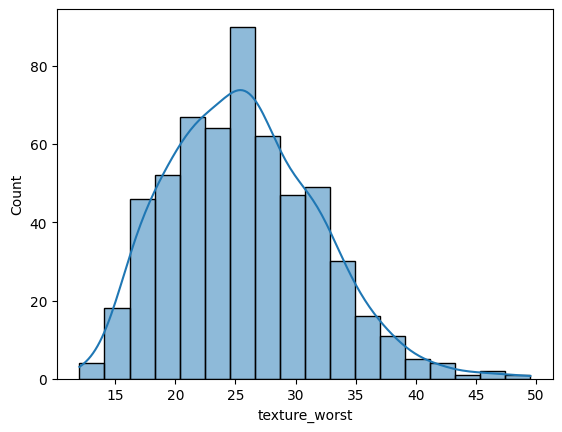

In [139]:
#histograma com curva normal
sns.histplot(dados_cancer, x = 'texture_worst', kde = True, stat = 'count')

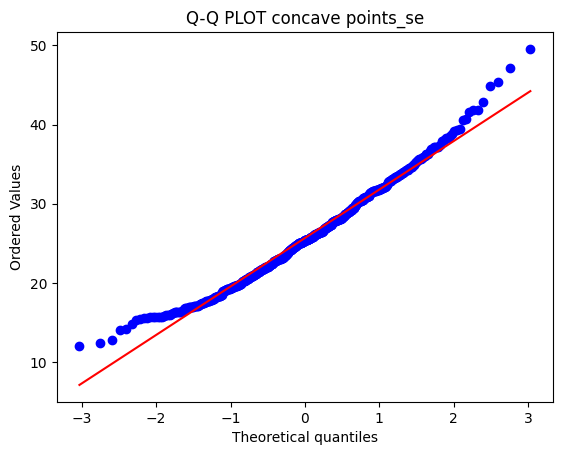

In [140]:
#QQ PLOT
sts.probplot(dados_cancer['texture_worst'], dist = 'norm', plot = plt)
plt.title('Q-Q PLOT concave points_se')
plt.show()

In [141]:
#box plot par aos outliers
px.box(dados_cancer, y = 'texture_worst')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'texture_worst=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa'},
              'name': '',
              'notched': False,
              'offsetgroup': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'box',
              'x0': ' ',
              'xaxis': 'x',
              'y': {'bdata': ('FK5H4XpUMUApXI/C9Wg3QEjhehSuhz' ... 'hcD0FA9ihcj8K1Q0AfhetRuF4+QA=='),
                    'dtype': 'f8'},
              'y0': ' ',
              'yaxis': 'y'}],
    'layout': {'boxmode': 'group',
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0]},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'texture_worst'}}}
})

In [142]:
#outliers
outliers = dados_cancer[dados_cancer['texture_worst'] > 41.85]
outliers['texture_worst']
outliers['texture_worst'].value_counts().sum()

np.int64(5)

**perimeter_worst**

Distribuição aproximadamente normal, 0 valores nulos

15 outliers para o limite superior, uma variabilidade muito baixo na dispersão dos registros

In [143]:
#frequencia
dados_cancer['perimeter_worst'].value_counts().sort_values()

perimeter_worst
78.78     1
122.10    1
88.83     1
94.94     1
95.78     1
         ..
112.00    2
184.60    2
101.70    3
105.90    3
117.70    3
Name: count, Length: 514, dtype: int64

In [144]:
#valores nulos
dados_cancer['perimeter_worst'].isnull().sum()

np.int64(0)

<Axes: xlabel='perimeter_worst', ylabel='Count'>

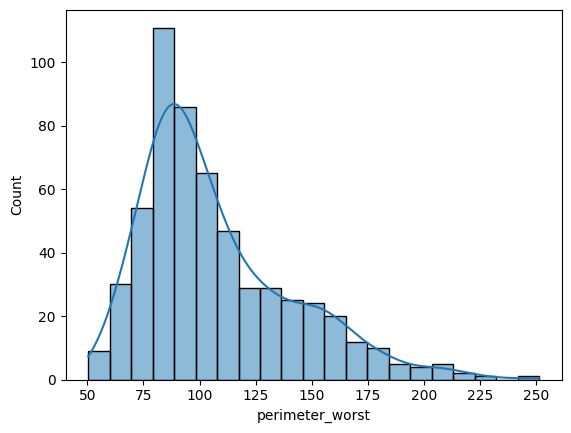

In [145]:
#histograma com curva normal
sns.histplot(dados_cancer, x = 'perimeter_worst', kde = True, stat = 'count')

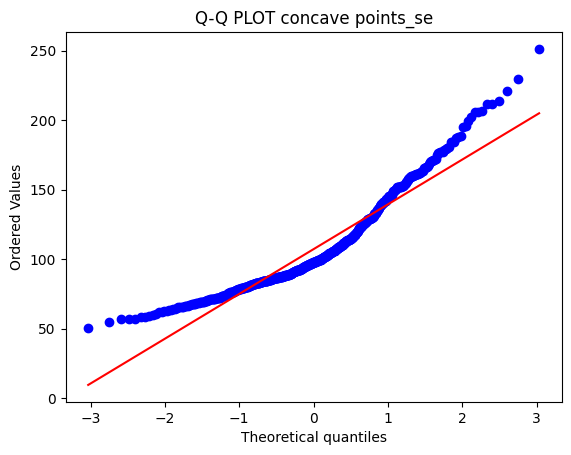

In [146]:
#QQ PLOT
sts.probplot(dados_cancer['perimeter_worst'], dist = 'norm', plot = plt)
plt.title('Q-Q PLOT concave points_se')
plt.show()

In [147]:
#box plot par aos outliers
px.box(dados_cancer, y = 'perimeter_worst')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'perimeter_worst=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa'},
              'name': '',
              'notched': False,
              'offsetgroup': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'box',
              'x0': ' ',
              'xaxis': 'x',
              'y': {'bdata': ('MzMzMzMTZ0CamZmZmdljQAAAAAAAEG' ... 'zMrF9AMzMzMzMTZ0AUrkfhepRNQA=='),
                    'dtype': 'f8'},
              'y0': ' ',
              'yaxis': 'y'}],
    'layout': {'boxmode': 'group',
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0]},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'perimeter_worst'}}}
})

In [148]:
#outliers
outliers = dados_cancer[dados_cancer['perimeter_worst'] > 186.8]
outliers['perimeter_worst']
outliers['perimeter_worst'].value_counts().sum()

np.int64(15)

**area_worst**

Distribuição aproximadamente não normal, 0 valores nulos, uma calda grande a direita

34 outliers para o limite superior, uma variabilidade na dispersão dos registros e no valor

In [149]:
#frequencia
dados_cancer['area_worst'].value_counts().sort_values()

area_worst
1321.0    1
457.8     1
629.6     1
688.6     1
729.8     1
         ..
439.6     2
1437.0    2
830.5     2
733.5     2
698.8     2
Name: count, Length: 544, dtype: int64

In [150]:
#valores nulos
dados_cancer['area_worst'].isnull().sum()

np.int64(0)

<Axes: xlabel='area_worst', ylabel='Count'>

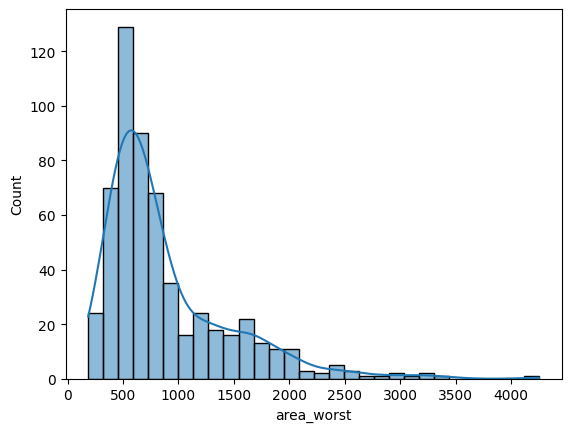

In [151]:
#histograma com curva normal
sns.histplot(dados_cancer, x = 'area_worst', kde = True, stat = 'count')

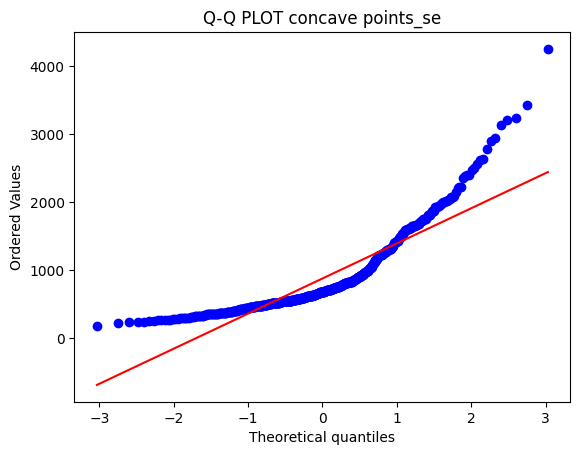

In [152]:
#QQ PLOT
sts.probplot(dados_cancer['area_worst'], dist = 'norm', plot = plt)
plt.title('Q-Q PLOT concave points_se')
plt.show()

In [153]:
#box plot par aos outliers
px.box(dados_cancer, y = 'area_worst')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'area_worst=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa'},
              'name': '',
              'notched': False,
              'offsetgroup': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'box',
              'x0': ' ',
              'xaxis': 'x',
              'y': {'bdata': ('AAAAAACMn0AAAAAAAJCeQAAAAAAAtJ' ... 'AAkJFAAAAAAAB0nECamZmZmclwQA=='),
                    'dtype': 'f8'},
              'y0': ' ',
              'yaxis': 'y'}],
    'layout': {'boxmode': 'group',
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0]},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'area_worst'}}}
})

In [154]:
#outliers
outliers = dados_cancer[dados_cancer['area_worst'] > 1938]
outliers['area_worst']
outliers['area_worst'].value_counts().sum()

np.int64(34)

**smoothness_worst**

Distribuição aparentemente normal, os dados estão muito proximo da reta no Q-Q PLOT, 0 valores nulos

6 outliers, 5 para o limite superior e 1 para o limite inferior, a variabilidade dos dados está muito baixo, tanto para a dispersão quanto para os valores dos registro.

In [155]:
#frequencia
dados_cancer['smoothness_worst'].value_counts().sort_values()

smoothness_worst
0.08996    1
0.16500    1
0.14100    1
0.12460    1
0.14920    1
          ..
0.12560    4
0.14150    4
0.12160    4
0.12340    4
0.14010    4
Name: count, Length: 411, dtype: int64

In [156]:
#valores nulos
dados_cancer['smoothness_worst'].isnull().sum()

np.int64(0)

<Axes: xlabel='smoothness_worst', ylabel='Count'>

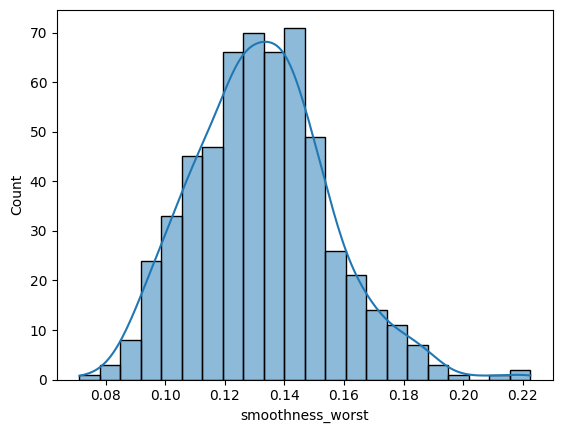

In [157]:
#histograma com curva normal
sns.histplot(dados_cancer, x = 'smoothness_worst', kde = True, stat = 'count')

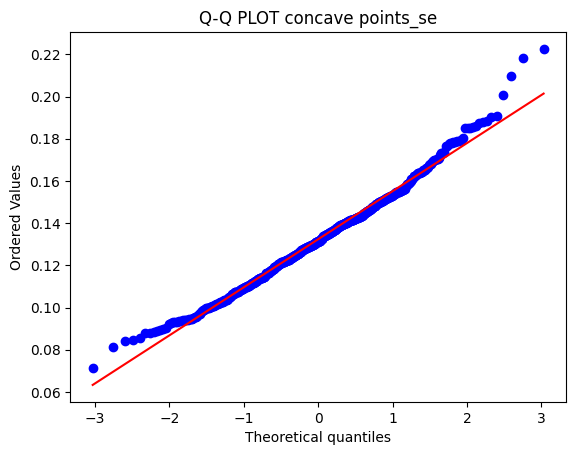

In [158]:
#QQ PLOT
sts.probplot(dados_cancer['smoothness_worst'], dist = 'norm', plot = plt)
plt.title('Q-Q PLOT concave points_se')
plt.show()

In [159]:
#box plot par aos outliers
px.box(dados_cancer, y = 'smoothness_worst')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'smoothness_worst=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa'},
              'name': '',
              'notched': False,
              'offsetgroup': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'box',
              'x0': ' ',
              'xaxis': 'x',
              'y': {'bdata': ('NKK0N/jCxD82qz5XW7G/P11txf6ye8' ... 'eMKL0/H4XrUbgexT+duvJZnge3Pw=='),
                    'dtype': 'f8'},
              'y0': ' ',
              'yaxis': 'y'}],
    'layout': {'boxmode': 'group',
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0]},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'smoothness_worst'}}}
})

In [160]:
#outliers
outliers = dados_cancer[dados_cancer['smoothness_worst'] > 0.1883]
outliers['smoothness_worst']
outliers['smoothness_worst'].value_counts().sum()

np.int64(6)

**compactness_worst**

Distribuição aparentemente não segue uma normalidade, 0 valores nulos

16 outliers para o limite superior, uma variabilidade pequena no valor dos registros. Uma calda grande a direita.

In [161]:
#frequencia
dados_cancer['compactness_worst'].value_counts().sort_values()

compactness_worst
0.6656    1
0.3124    1
0.2074    1
0.1364    1
0.1632    1
         ..
0.2170    2
0.1517    2
0.2031    2
0.1486    3
0.3416    3
Name: count, Length: 529, dtype: int64

In [162]:
#valores nulos
dados_cancer['compactness_worst'].isnull().sum()

np.int64(0)

<Axes: xlabel='compactness_worst', ylabel='Count'>

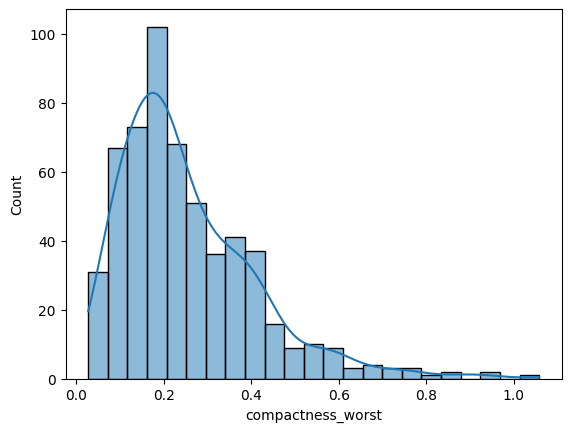

In [163]:
#histograma com curva normal
sns.histplot(dados_cancer, x = 'compactness_worst', kde = True, stat = 'count')

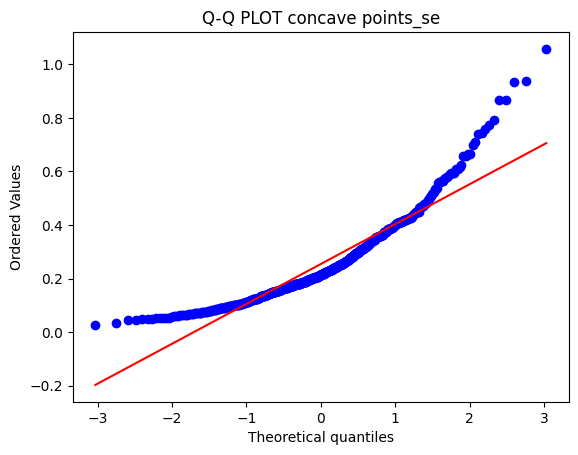

In [164]:
#QQ PLOT
sts.probplot(dados_cancer['compactness_worst'], dist = 'norm', plot = plt)
plt.title('Q-Q PLOT concave points_se')
plt.show()

In [165]:
#box plot par aos outliers
px.box(dados_cancer, y = 'compactness_worst')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'compactness_worst=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa'},
              'name': '',
              'notched': False,
              'offsetgroup': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'box',
              'x0': ' ',
              'xaxis': 'x',
              'y': {'bdata': ('lPYGX5hM5T80gLdAguLHP166SQwCK9' ... 'g1zdM/Dwu1pnnH6z+s4o3MI3+wPw=='),
                    'dtype': 'f8'},
              'y0': ' ',
              'yaxis': 'y'}],
    'layout': {'boxmode': 'group',
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0]},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'compactness_worst'}}}
})

In [166]:
#outliers
outliers = dados_cancer[dados_cancer['compactness_worst'] > 0.6247]
outliers['compactness_worst']
outliers['compactness_worst'].value_counts().sum()

np.int64(16)

**concavity_worst**

Distribuição aparenta normalidade, 0 valores nulos

42 outliers para o limite superior, uma calda grade a direita, uma pequena variabilidade nos valores do registros e dispersão do dados em relação a reta.



In [167]:
#frequencia
dados_cancer['concavity_worst'].value_counts().sort_values()

concavity_worst
0.07993     1
0.17830     1
0.55390     1
0.09350     1
0.06194     1
           ..
0.18110     2
0.39650     2
0.45040     3
0.13770     3
0.00000    13
Name: count, Length: 539, dtype: int64

In [168]:
#valores nulos
dados_cancer['concavity_worst'].isnull().sum()

np.int64(0)

<Axes: xlabel='concavity_worst', ylabel='Count'>

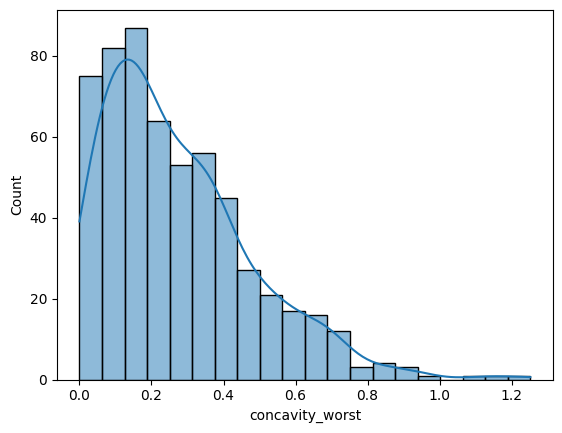

In [169]:
#histograma com curva normal
sns.histplot(dados_cancer, x = 'concavity_worst', kde = True, stat = 'count')

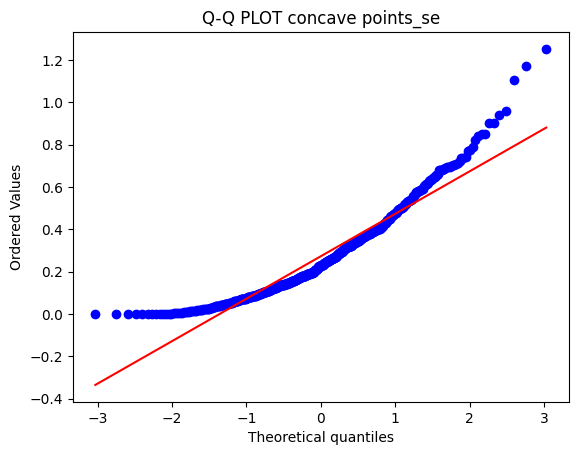

In [170]:
#QQ PLOT
sts.probplot(dados_cancer['concavity_worst'], dist = 'norm', plot = plt)
plt.title('Q-Q PLOT concave points_se')
plt.show()

In [171]:
#box plot par aos outliers
px.box(dados_cancer, y = 'compactness_worst')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'compactness_worst=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa'},
              'name': '',
              'notched': False,
              'offsetgroup': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'box',
              'x0': ' ',
              'xaxis': 'x',
              'y': {'bdata': ('lPYGX5hM5T80gLdAguLHP166SQwCK9' ... 'g1zdM/Dwu1pnnH6z+s4o3MI3+wPw=='),
                    'dtype': 'f8'},
              'y0': ' ',
              'yaxis': 'y'}],
    'layout': {'boxmode': 'group',
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0]},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'compactness_worst'}}}
})

In [172]:
#outliers
outliers = dados_cancer[dados_cancer['concavity_worst'] > 0.6247]
outliers['concavity_worst']
outliers['concavity_worst'].value_counts().sum()

np.int64(42)

**concave points_worst**
Absoluta certeza que segue uma distribuição normal, contendo 0 valores nulos

0 outliers, uma variabilidade nos dados no registros e dispersão quase nula.

In [173]:
#frequencia
dados_cancer['concave points_worst'].value_counts().sort_values()

concave points_worst
0.27010     1
0.06493     1
0.09127     1
0.02232     1
0.09653     1
           ..
0.02564     3
0.04306     3
0.05556     3
0.18270     3
0.00000    13
Name: count, Length: 492, dtype: int64

In [174]:
#valores nulos
dados_cancer['concave points_worst'].isnull().sum()

np.int64(0)

<Axes: xlabel='concave points_worst', ylabel='Count'>

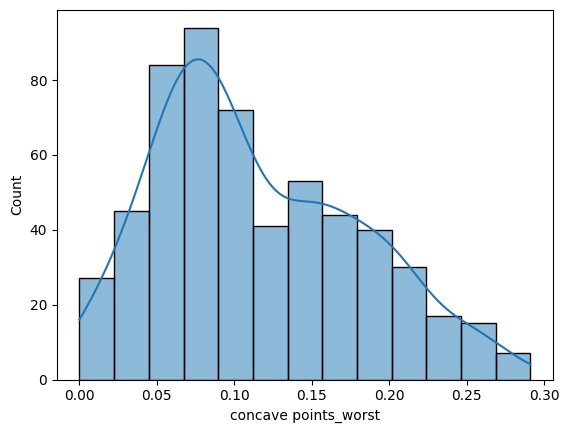

In [175]:
#histograma com curva normal
sns.histplot(dados_cancer, x = 'concave points_worst', kde = True, stat = 'count')

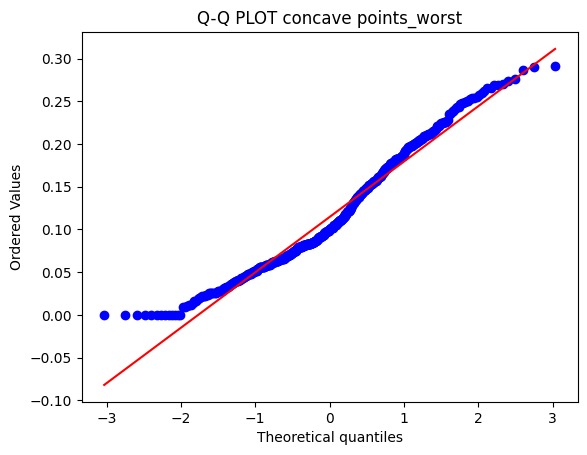

In [176]:
#QQ PLOT
sts.probplot(dados_cancer['concave points_worst'], dist = 'norm', plot = plt)
plt.title('Q-Q PLOT concave points_worst')
plt.show()

In [177]:
#box plot par aos outliers
px.box(dados_cancer, y = 'concave points_worst')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'concave points_worst=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa'},
              'name': '',
              'notched': False,
              'offsetgroup': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'box',
              'x0': ' ',
              'xaxis': 'x',
              'y': {'bdata': ('B/AWSFD80D8CK4cW2c7HP7TIdr6fGs' ... '2AJsI/9ihcj8L10D8AAAAAAAAAAA=='),
                    'dtype': 'f8'},
              'y0': ' ',
              'yaxis': 'y'}],
    'layout': {'boxmode': 'group',
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0]},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'concave points_worst'}}}
})

In [178]:
#outliers
outliers = dados_cancer[dados_cancer['concave points_worst'] > 0.291]
outliers['concave points_worst']
outliers['concave points_worst'].value_counts().sum()

np.int64(0)

**symmetry_worst**

Distribuição aparentemente normal, 0 valores nulos

23 Outliers para o limite superior, uma variabilidade baixa na dispersão dos dados, calda à direita.

In [179]:
#frequencia
dados_cancer['symmetry_worst'].value_counts().sort_values()

symmetry_worst
0.2329    1
0.2060    1
0.2218    1
0.6638    1
0.3706    1
         ..
0.2226    3
0.3196    3
0.2972    3
0.3109    3
0.2369    3
Name: count, Length: 500, dtype: int64

In [180]:
#valores nulos
dados_cancer['symmetry_worst'].isnull().sum()

np.int64(0)

<Axes: xlabel='symmetry_worst', ylabel='Count'>

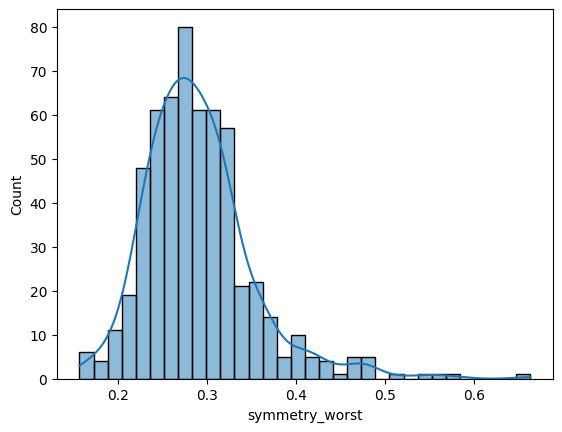

In [181]:
#histograma com curva normal
sns.histplot(dados_cancer, x = 'symmetry_worst', kde = True, stat = 'count')

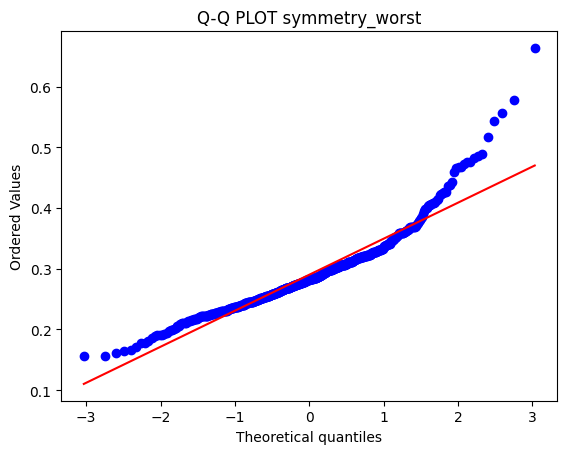

In [182]:
#QQ PLOT
sts.probplot(dados_cancer['symmetry_worst'], dist = 'norm', plot = plt)
plt.title('Q-Q PLOT symmetry_worst')
plt.show()

In [183]:
#box plot par aos outliers
px.box(dados_cancer, y = 'symmetry_worst')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'symmetry_worst=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa'},
              'name': '',
              'notched': False,
              'offsetgroup': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'box',
              'x0': ' ',
              'xaxis': 'x',
              'y': {'bdata': ('Ne84RUdy3T+amZmZmZnRPwHeAgmKH9' ... 'HxY8w/RwN4CyQo2j9Wn6ut2F/SPw=='),
                    'dtype': 'f8'},
              'y0': ' ',
              'yaxis': 'y'}],
    'layout': {'boxmode': 'group',
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0]},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'symmetry_worst'}}}
})

In [184]:
#outliers
outliers = dados_cancer[dados_cancer['symmetry_worst'] > 0.4154]
outliers['symmetry_worst']
outliers['symmetry_worst'].value_counts().sum()

np.int64(23)

**fractal_dimension_worst**

Distribuição aparentemente normal, 0 valores nulos

24 outliers para o limite superior, uma variabilidade baixa na dispersão dos registros, calda a direita.

In [185]:
#frequencia
dados_cancer['fractal_dimension_worst'].value_counts().sort_values()

fractal_dimension_worst
0.09618    1
0.07569    1
0.08758    1
0.09970    1
0.09938    1
          ..
0.09136    2
0.07863    2
0.07127    2
0.12520    2
0.07427    3
Name: count, Length: 535, dtype: int64

In [186]:
#valores nulos
dados_cancer['fractal_dimension_worst'].isnull().sum()

np.int64(0)

<Axes: xlabel='fractal_dimension_worst', ylabel='Count'>

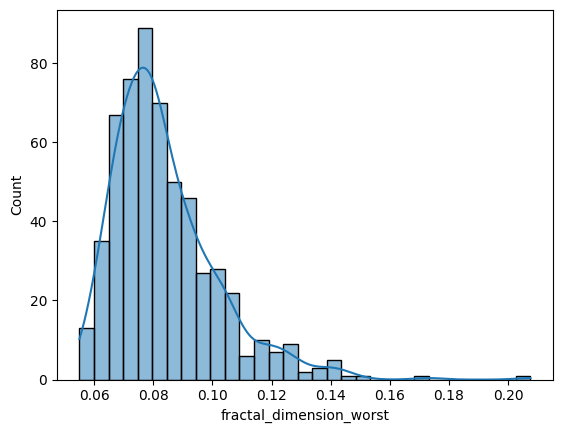

In [187]:
#histograma com curva normal
sns.histplot(dados_cancer, x = 'fractal_dimension_worst', kde = True, stat = 'count')

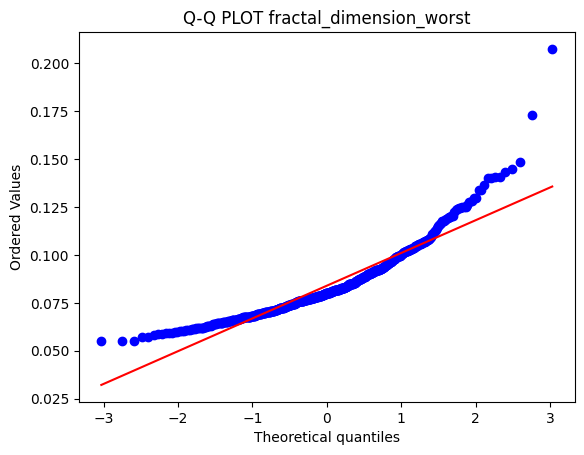

In [188]:
#QQ PLOT
sts.probplot(dados_cancer['fractal_dimension_worst'], dist = 'norm', plot = plt)
plt.title('Q-Q PLOT fractal_dimension_worst')
plt.show()

In [189]:
#box plot par aos outliers
px.box(dados_cancer, y = 'fractal_dimension_worst')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'fractal_dimension_worst=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa'},
              'name': '',
              'notched': False,
              'offsetgroup': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'box',
              'x0': ' ',
              'xaxis': 'x',
              'y': {'bdata': ('AJF++zpwvj+ZnrDEA8q2P0GfyJOka7' ... 'rqBLQ/WDm0yHa+vz8TJ/c7FAWyPw=='),
                    'dtype': 'f8'},
              'y0': ' ',
              'yaxis': 'y'}],
    'layout': {'boxmode': 'group',
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0]},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'fractal_dimension_worst'}}}
})

In [190]:
#outliers
outliers = dados_cancer[dados_cancer['fractal_dimension_worst'] > 0.1224]
outliers['fractal_dimension_worst']
outliers['fractal_dimension_worst'].value_counts().sum()

np.int64(24)

#**TRATAMENTO DAS VARIAVEIS**

**Tratamento de valores missing em registros ou colunas**

In [191]:
#variaveis e seus valores nulos.
dados_cancer.isnull().sum()


id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

**Coluna: 'Unnamed: 32', era a unica que possuia algum valor nulo e não estava na matriz original dos dados, resumindo, não servia para nada.**

In [7]:
#excluindo valores nulos
dados_cancer.drop(['Unnamed: 32'],axis = 1, inplace = True)
display(dados_cancer.head())
dados_cancer.shape

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


(569, 32)

**Coluna: 'id', está sendo excluida por não servir para previsão, somente é utilizada para identificação no banco de dados do sistema.**

In [10]:
#excluindo coluna ID
dados_cancer.drop(['id'], axis = 1, inplace= True)
display(dados_cancer.head())
dados_cancer.shape

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


(569, 31)

**Analise Descritiva do dataset**

In [13]:
#estatistica das variaveis
dados_cancer.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [15]:
#salvando dataframe pós analisado e tratado
dados_cancer.to_csv('dados_cancer_tratado.csv', sep = ',', encoding = 'iso-8859-1', index = False)

**PRÉ PROCESSAMENTO DOS DADOS**

Substituição das variaveis categoricas

diagnosis: 0 = M (maligno), 1 = (benigno)

Separação previsores e alvo, treino e teste

**Legenda das variaveis**

**ALVO:**
diagnosis: M = 0, B = 1

**PREVISORES:**
todas as 30 variaveis.





#**SEPARANDO TREINO E TESTE (EVITAR VAZAMENTO DOS DADOS)**



In [19]:
#Importando a base de dados analisada e tratada
dados_cancer_tratado = pd.read_csv('../data/processed/dados_cancer_tratado.csv', sep = ',', encoding = 'iso-8859-1')
display(dados_cancer_tratado.head())

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [21]:
#previsores
treino = dados_cancer_tratado.drop(['diagnosis'], axis = 1)
display(treino.head())
treino.shape

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


(569, 30)

In [23]:
#alvo
teste = dados_cancer['diagnosis']
#transformando as classes em binario
labell_encoder = LabelEncoder() #Encoder
teste_encodgin = labell_encoder.fit_transform(teste) #transformando
print(teste_encodgin) #exibição do array
labell_encoder.classes_ #descobrindo o valor da transformação de cada classe

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1
 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1
 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0
 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 1 0 0 1 

array(['B', 'M'], dtype=object)

In [25]:
#separando os dados em treino e teste
x_train, x_test, y_train, y_test = train_test_split(treino, teste_encodgin, test_size= 0.3, random_state= 3)

In [29]:
#separando ordinais e nominais
binarias = ['diagnosis']
numericas = [coluna for coluna in treino.columns if coluna not in binarias]

In [31]:
#pre-processamento, escalonando as features.
previsores_esc = ColumnTransformer(
    transformers = [
        ('numeric', StandardScaler(), numericas)
    ]
)

**RESUMO DO PRÉ-PROCESSAMENTO**

previsores: conjunto das variaveis previsoras, com as variaveis qualitativas nominais transformanda em ordinais pelo LabelEncoder

previsores_esc: conjunto das variaveis previsoras ja transformanda (LabelEncoder) e escalonada

**kfold = (n_splits = 30, shuffle = True, random_state = 5)**


### PIPELINE DOS ALGORTIMOS ###

In [49]:
# PIPELINE PARA NAIVE BAYES
pipeline_previsores_Naive = Pipeline([
    ('clt', GaussianNB())
])

pipeline_previsores_esc_Naive = Pipeline([
    ('pre', previsores_esc),
    ('clt', GaussianNB())
])

# PIPELINE PARA MAQUINAS DE VETOR DE SUPORTE (SVC)
pipeline_previsoes_SVC = Pipeline([
    ('clt', SVC(random_state = 0))
])
pipeline_previsoes_esc_SVC = Pipeline([
    ('pre-processamento',previsores_esc),
    ('clt', SVC(random_state = 0 ))
])

# PIPELINE PARA REGRESSÃO LOGISTICA
pipeline_previsoes_LG = Pipeline([
    ('clt', LogisticRegression(random_state = 0 ))
])
pipeline_previsoes_esc_LG = Pipeline([
    ('pre-processamento',  previsores_esc),
    ('clt', LogisticRegression(random_state = 0 ))
])

# PIPELINE KNN
pipeline_previsoes_KNN = Pipeline([
    ('clt', KNeighborsClassifier())
])
pipeline_previsoes_esc_KNN = Pipeline([
    ('pre-processamento',  previsores_esc),
    ('clt', KNeighborsClassifier())
])

# PIPELINE ARVORE DE DECISÃO
pipeline_previsoes_TREE = Pipeline([
    ('clt', DecisionTreeClassifier(random_state = 0 ))
])
pipeline_previsoes_esc_TREE = Pipeline([
    ('pre-processamento',  previsores_esc),
    ('clt', DecisionTreeClassifier(random_state = 0 ))
])

# PIPELINE RANDOM FOREST
pipeline_previsoes_FOREST = Pipeline([
    ('clt', RandomForestClassifier(random_state = 0 ))
])
pipeline_previsoes_esc_FOREST = Pipeline([
    ('pre-processamento',  previsores_esc),
    ('clt', RandomForestClassifier(random_state = 0 ))
])

# PIPELINE XGBOOST
pipeline_previsoes_XGB = Pipeline([
    ('clt', XGBClassifier(random_state = 0 ))
])
pipeline_previsoes_esc_XGB = Pipeline([
    ('pre-processamento', previsores_esc),
    ('clt', XGBClassifier(random_state = 0 ))
])

# PIPELINE LIGHT GBM
pipeline_previsoes_LGBM = Pipeline([
    ('clt', LGBMClassifier(random_state = 0 ))
])
pipeline_previsoes_esc_LGBM = Pipeline([
    ('pre-processamento',  previsores_esc),
    ('clt', LGBMClassifier(random_state = 0 ))
])

# PIPELINE CATBOOST
pipeline_previsoes_XGB = Pipeline([
    ('clt', CatBoostClassifier(random_state = 0 ))
])
pipeline_previsoes_esc_XGB = Pipeline([
    ('pre-processamento',  previsores_esc),
    ('clt', CatBoostClassifier(random_state = 0 ))
])


#**NAIVE BAYES**


**Previsores (somente LabelEncoding)**

In [205]:
#treinamento e teste
print('\n Avaliação em dados de teste previsores')
pipeline_previsores.fit(x_train, y_train)
previsores_xteste = pipeline_previsores.predict(x_test)
print('Acurácia do teste previsores: {:.2%}'.format(accuracy_score(y_test, previsores_xteste)))
confusion_matrix(y_test, previsores_xteste)


 Avaliação em dados de teste previsores
Acurácia do teste previsores: 94.74%


array([[106,   3],
       [  6,  56]])

In [206]:
#estatistica geral do modelo
print(classification_report(y_test, previsores_xteste))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       109
           1       0.95      0.90      0.93        62

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171



In [207]:
#treinamento e teste do treino
print('\n Avaliação da acurácia do treino')
previsores_xtreino = pipeline_previsores.predict(x_train)
print('Acurácia do treino: {:.2%}'.format(accuracy_score(y_train, previsores_xtreino)))
confusion_matrix(y_train, previsores_xtreino)


 Avaliação da acurácia do treino
Acurácia do treino: 93.72%


array([[243,   5],
       [ 20, 130]])

In [208]:
#estatistica geral do modelo de treino
print(classification_report(y_train, previsores_xtreino))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       248
           1       0.96      0.87      0.91       150

    accuracy                           0.94       398
   macro avg       0.94      0.92      0.93       398
weighted avg       0.94      0.94      0.94       398



In [209]:
#validação cruzada
kfold = KFold(n_splits = 30, shuffle = True, random_state = 5)
modelo = GaussianNB()
resultado = cross_val_score(modelo, treino, teste_encodgin, cv = kfold)
print('Acurácia da validação: {:.2%}'.format(resultado.mean()))

Acurácia da validação: 93.82%


**Previsores_esc**

In [210]:
#acurácia do teste
print('\n Avaliação em dados de teste previsores_esc')
pipeline_previsores_esc.fit(x_train, y_train)
previsores_esc_xteste = pipeline_previsores_esc.predict(x_test)
print('Acurácia do teste previsores_esc: {:.2%}'.format(accuracy_score(y_test, previsores_esc_xteste)))
confusion_matrix(y_test, previsores_esc_xteste)


 Avaliação em dados de teste previsores_esc
Acurácia do teste previsores_esc: 94.15%


array([[104,   5],
       [  5,  57]])

In [211]:
#estatistica geral
print(classification_report(y_test, previsores_esc_xteste))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       109
           1       0.92      0.92      0.92        62

    accuracy                           0.94       171
   macro avg       0.94      0.94      0.94       171
weighted avg       0.94      0.94      0.94       171



In [212]:
#acurácia no treino
print('\n Avaliação da acurácia do treino')
previsores_esc_xtreino = pipeline_previsores_esc.predict(x_train)
print('Acurácia do treino: {:.2%}'.format(accuracy_score(y_train, previsores_esc_xtreino)))
confusion_matrix(y_train, previsores_esc_xtreino)



 Avaliação da acurácia do treino
Acurácia do treino: 93.72%


array([[240,   8],
       [ 17, 133]])

In [213]:
#validação cruzada
resultado = cross_val_score(pipeline_previsores_esc, treino, teste_encodgin, cv = 30)
print('acurácia: {:.2%}'.format(resultado.mean()))

acurácia: 93.32%


#**MAQUINA DE VETOR DE SUPORTE (SVM)**

In [214]:
#criando o modelo
svm = SVC(random_state= 0)

In [215]:
#criando os parametros que serão aplicados no grid
parametros_grid = dict(kernel = ['rbf', 'linear', 'poly','sigmoid'],random_state = [1,2,3,4], C = [1,2,3,4])
#exibindo a quantidade de combinações possiveos
print("Numero de combinações de hiperparametros: {}".format(len(parametros_grid['kernel'] * len(parametros_grid['random_state'] * len(parametros_grid['C'])))))
#criando o grid, com o modelo, os parametros, scoring e a quantidade de divisões para a validação cruzada
grid_svm = GridSearchCV(svm, parametros_grid, scoring= 'roc_auc', cv = 4)

Numero de combinações de hiperparametros: 64


In [216]:
grid_svm.fit(x_train, y_train)

,estimator,SVC(random_state=0)
,param_grid,"{'C': [1, 2, ...], 'kernel': ['rbf', 'linear', ...], 'random_state': [1, 2, ...]}"
,scoring,'roc_auc'
,n_jobs,None
,refit,True
,cv,4
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,3


In [217]:
#melhor hiperparametro
grid_svm.best_params_

{'C': 3, 'kernel': 'linear', 'random_state': 1}

In [218]:
#todos os resultados das combinações
resultado_grid_svm = pd.DataFrame(grid_svm.cv_results_)
resultado_grid_svm.sort_values('rank_test_score', ascending= True)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,param_random_state,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
36,3.661361,2.445584,0.005288,0.000222,3,linear,1,"{'C': 3, 'kernel': 'linear', 'random_state': 1}",0.997453,0.992360,0.977768,0.991282,0.989716,0.007281,1
37,3.583814,2.354681,0.005511,0.001347,3,linear,2,"{'C': 3, 'kernel': 'linear', 'random_state': 2}",0.997453,0.992360,0.977768,0.991282,0.989716,0.007281,1
38,3.577717,2.365629,0.005283,0.000864,3,linear,3,"{'C': 3, 'kernel': 'linear', 'random_state': 3}",0.997453,0.992360,0.977768,0.991282,0.989716,0.007281,1
39,3.678540,2.468340,0.005718,0.001357,3,linear,4,"{'C': 3, 'kernel': 'linear', 'random_state': 4}",0.997453,0.992360,0.977768,0.991282,0.989716,0.007281,1
7,2.340801,1.154825,0.005623,0.001165,1,linear,4,"{'C': 1, 'kernel': 'linear', 'random_state': 4}",0.997878,0.994907,0.974281,0.991282,0.989587,0.009140,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44,0.011004,0.002451,0.006727,0.000488,3,sigmoid,1,"{'C': 3, 'kernel': 'sigmoid', 'random_state': 1}",0.178268,0.238964,0.316478,0.197036,0.232687,0.053134,57
60,0.009911,0.001494,0.007667,0.000960,4,sigmoid,1,"{'C': 4, 'kernel': 'sigmoid', 'random_state': 1}",0.178268,0.235993,0.311683,0.196600,0.230636,0.051230,61
61,0.010958,0.002891,0.007646,0.001483,4,sigmoid,2,"{'C': 4, 'kernel': 'sigmoid', 'random_state': 2}",0.178268,0.235993,0.311683,0.196600,0.230636,0.051230,61
62,0.013022,0.000992,0.007910,0.000235,4,sigmoid,3,"{'C': 4, 'kernel': 'sigmoid', 'random_state': 3}",0.178268,0.235993,0.311683,0.196600,0.230636,0.051230,61


In [219]:
#pipeline sem escalonamento
pipeline_previsores_svm = Pipeline([
    ('clt', SVC(kernel= 'linear', random_state= 1, C = 3))
])
pipeline_previsores_esc_svm = Pipeline([
    ('pre', previsores_esc),
    ('clt', SVC(kernel = 'linear', random_state= 1, C = 3))
])

In [220]:
#teste
print('\n Previsores(sem escalonar) SVM - Teste')
pipeline_previsores_svm.fit(x_train, y_train)
previsores_xteste_svm = pipeline_previsores_svm.predict(x_test)
print('Acurácia previsores(sem escalonar) SVM: {:.2%}'.format(accuracy_score(y_test, previsores_xteste_svm)))
confusion_matrix(y_test, previsores_xteste_svm)


 Previsores(sem escalonar) SVM - Teste
Acurácia previsores(sem escalonar) SVM: 94.74%


array([[105,   4],
       [  5,  57]])

In [221]:
#treino
print('\n Previsores(sem escalonar) SVM - Treino')
pipeline_previsores_svm.fit(x_train, y_train)
previsores_xtreino_svm = pipeline_previsores_svm.predict(x_train)
print('Acurácia previsores(sem escalonar) SVM: {:.2%}'.format(accuracy_score(y_train, previsores_xtreino_svm)))
confusion_matrix(y_train, previsores_xtreino_svm)


 Previsores(sem escalonar) SVM - Treino
Acurácia previsores(sem escalonar) SVM: 96.48%


array([[244,   4],
       [ 10, 140]])

In [222]:
#validação cruzada
kfold = KFold(n_splits= 30, shuffle = True, random_state = 5)
modelo = SVC(kernel = 'linear', random_state= 1 , C = 3)
resultado_svm = cross_val_score(modelo, treino, teste_encodgin, cv = kfold)
print('Acurácia validação cruzada: {:.2%}'.format(resultado_svm.mean()))

Acurácia validação cruzada: 95.41%


**previsores_esc**

In [223]:
#teste
print('\n Previsores_esc(escalonado) SVM - Teste')
pipeline_previsores_esc_svm.fit(x_train, y_train)
previsores_esc_xteste_svm = pipeline_previsores_esc_svm.predict(x_test)
print('Acurácia do teste: {:.2%}'.format(accuracy_score(y_test, previsores_esc_xteste_svm)))
confusion_matrix(y_test, previsores_esc_xteste_svm)


 Previsores_esc(escalonado) SVM - Teste
Acurácia do teste: 98.25%


array([[108,   1],
       [  2,  60]])

In [224]:
#treino
print('\n Previsores(escalonado) SVM - Treino')
previsores_esc_xtreino_svm = pipeline_previsores_esc_svm.predict(x_train)
print('Acurácia previsores(escalonado) SVM: {:.2%}'.format(accuracy_score(y_train, previsores_esc_xtreino_svm)))
confusion_matrix(y_train, previsores_esc_xtreino_svm)


 Previsores(escalonado) SVM - Treino
Acurácia previsores(escalonado) SVM: 98.74%


array([[245,   3],
       [  2, 148]])

In [225]:
#validação cruzada
resultado = cross_val_score(pipeline_previsores_esc_svm, treino, teste_encodgin, cv = 30)
print('acurácia da validação cruzada: {:.2%}'.format(resultado.mean()))

acurácia da validação cruzada: 97.54%


#**Regressão Logística**

In [226]:
#rg
rg = LogisticRegression(random_state = 0)

In [227]:
#criando os parametros que serão aplicados no grid
parametros_grid = dict(solver = ['lbfgs', 'liblinear', 'sag', 'saga'],tol = [0.0001,0.0002,0.0003],
                       random_state = [1,2,3], C = [1,2,3,4], penalty = ['None','l2'], max_iter = [300,400,500,600,700])
#exibindo a quantidade de combinações possiveos
print("Numero de combinações de hiperparametros: {}".format(len(parametros_grid['solver']) * len(parametros_grid['random_state']) * len(parametros_grid['C']) * len(parametros_grid['penalty']) * len(parametros_grid['max_iter']) * len(parametros_grid['tol'])))
#criando o grid, com o modelo, os parametros, scoring e a quantidade de divisões para a validação cruzada
grid_rg = GridSearchCV(rg, parametros_grid, scoring= 'roc_auc', cv = 4)

Numero de combinações de hiperparametros: 1440


In [228]:

grid_rg.fit(x_train,y_train)

,estimator,LogisticRegre...andom_state=0)
,param_grid,"{'C': [1, 2, ...], 'max_iter': [300, 400, ...], 'penalty': ['None', 'l2'], 'random_state': [1, 2, ...], ...}"
,scoring,'roc_auc'
,n_jobs,None
,refit,True
,cv,4
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l2'


In [229]:
#treino
grid_rg.best_params_

{'C': 1,
 'max_iter': 600,
 'penalty': 'l2',
 'random_state': 1,
 'solver': 'lbfgs',
 'tol': 0.0001}

In [230]:
#ranking dos melhores parametros
resultado_grid_rg = pd.DataFrame(grid_rg.cv_results_)
resultado_grid_rg.sort_values('rank_test_score', ascending= True)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_max_iter,param_penalty,param_random_state,param_solver,param_tol,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
276,0.273499,0.006637,0.004776,0.000684,1,600,l2,3,lbfgs,0.0001,"{'C': 1, 'max_iter': 600, 'penalty': 'l2', 'ra...",0.998727,0.996604,0.984743,0.993461,0.993384,0.005329,1
253,0.304927,0.018484,0.004213,0.000150,1,600,l2,1,lbfgs,0.0002,"{'C': 1, 'max_iter': 600, 'penalty': 'l2', 'ra...",0.998727,0.996604,0.984743,0.993461,0.993384,0.005329,1
266,0.288613,0.019247,0.004940,0.000851,1,600,l2,2,lbfgs,0.0003,"{'C': 1, 'max_iter': 600, 'penalty': 'l2', 'ra...",0.998727,0.996604,0.984743,0.993461,0.993384,0.005329,1
252,0.324235,0.015170,0.004763,0.000750,1,600,l2,1,lbfgs,0.0001,"{'C': 1, 'max_iter': 600, 'penalty': 'l2', 'ra...",0.998727,0.996604,0.984743,0.993461,0.993384,0.005329,1
265,0.292311,0.007388,0.004231,0.000247,1,600,l2,2,lbfgs,0.0002,"{'C': 1, 'max_iter': 600, 'penalty': 'l2', 'ra...",0.998727,0.996604,0.984743,0.993461,0.993384,0.005329,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525,0.000622,0.000017,0.000000,0.000000,2,500,None,2,saga,0.0001,"{'C': 2, 'max_iter': 500, 'penalty': 'None', '...",NaN,NaN,NaN,NaN,NaN,NaN,721
526,0.000615,0.000002,0.000000,0.000000,2,500,None,2,saga,0.0002,"{'C': 2, 'max_iter': 500, 'penalty': 'None', '...",NaN,NaN,NaN,NaN,NaN,NaN,721
527,0.000796,0.000115,0.000000,0.000000,2,500,None,2,saga,0.0003,"{'C': 2, 'max_iter': 500, 'penalty': 'None', '...",NaN,NaN,NaN,NaN,NaN,NaN,721
16,0.000923,0.000082,0.000000,0.000000,1,300,None,2,liblinear,0.0002,"{'C': 1, 'max_iter': 300, 'penalty': 'None', '...",NaN,NaN,NaN,NaN,NaN,NaN,721


In [231]:
#pipelines
pipeline_previsores_rg = Pipeline([
    ('clt',LogisticRegression(C =  3, max_iter =  300, penalty = 'l2', random_state = 1,solver =  'lbfgs', tol = 0.0001))
])
pipeline_previsores_esc_rg = Pipeline([
    ('pre', previsores_esc),
    ('clt', LogisticRegression(C =  3, max_iter =  300, penalty = 'l2', random_state = 1,solver =  'lbfgs', tol = 0.0001))
])

In [232]:
#treinamento e teste
print('\n Avaliação em dados de teste previsores (rg)')
pipeline_previsores_rg.fit(x_train, y_train)
previsores_xteste_rg = pipeline_previsores_rg.predict(x_test)
print('Acurácia do teste previsores (rg): {:.2%}'.format(accuracy_score(y_test, previsores_xteste_rg)))
confusion_matrix(y_test, previsores_xteste_rg)



 Avaliação em dados de teste previsores (rg)
Acurácia do teste previsores (rg): 94.74%


array([[105,   4],
       [  5,  57]])

In [233]:
#estatisca geral do teste
print(classification_report(y_test, previsores_xteste_rg))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       109
           1       0.93      0.92      0.93        62

    accuracy                           0.95       171
   macro avg       0.94      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171



In [234]:
#treino
print('\n Avaliação em dados de treino previsores (rg)')
previsores_xtreino_rg = pipeline_previsores_rg.predict(x_train)
print('Acurácia do teste previsores (rg): {:.2%}'.format(accuracy_score(y_train, previsores_xtreino_rg)))
confusion_matrix(y_train, previsores_xtreino_rg)


 Avaliação em dados de treino previsores (rg)
Acurácia do teste previsores (rg): 95.73%


array([[241,   7],
       [ 10, 140]])

In [235]:
#validação cruzada
resultado = cross_val_score(pipeline_previsores_rg, treino, teste_encodgin, cv = 30)
print('Acurácia da validação cruzada: {:.2%}'.format(resultado.mean()))


Acurácia da validação cruzada: 95.60%


**previsores_esc**

In [236]:
#test
print('\n Avaliação em dados de treino previsores_esc (rg)')
pipeline_previsores_esc_rg.fit(x_train, y_train)
previsores_esc_xteste_rg = pipeline_previsores_esc_rg.predict(x_test)
print('Acurácia teste: {:.2%}'.format(accuracy_score(y_test, previsores_esc_xteste_rg)))
confusion_matrix(y_test, previsores_esc_xteste_rg)


 Avaliação em dados de treino previsores_esc (rg)
Acurácia teste: 97.66%


array([[108,   1],
       [  3,  59]])

In [237]:
#treino
print('\n Avaliação em dados de treino previsores_esc (rg)')
previsores_esc_xtreino_rg = pipeline_previsores_esc_rg.predict(x_train)
print('acurácia do treino: {:.2%}'.format(accuracy_score(y_train, previsores_esc_xtreino_rg)))
confusion_matrix(y_train, previsores_esc_xtreino_rg)


 Avaliação em dados de treino previsores_esc (rg)
acurácia do treino: 98.74%


array([[246,   2],
       [  3, 147]])

In [238]:
#validação cruzada previsores_esc
resultado = cross_val_score(pipeline_previsores_esc_rg, treino, teste_encodgin, cv = 30)
print('acurácia da validação cruzada: {:.2%}'.format(resultado.mean()))

acurácia da validação cruzada: 97.72%


#**KNN**


In [239]:
knn = KNeighborsClassifier()

In [240]:
#criando os parametros que serão aplicados no grid
parametros_grid = dict(n_neighbors = [8,9,10,12,13,14], metric = ['euclidean','manhattan','minkowski'], p = [1,2,3] )
#exibindo a quantidade de combinações possiveos
print("Numero de combinações de hiperparametros: {}".format(len(parametros_grid['n_neighbors']) * len(parametros_grid['metric']) * len(parametros_grid['p'])))
#criando o grid, com o modelo, os parametros, scoring e a quantidade de divisões para a validação cruzada
grid_KNN = GridSearchCV(knn, parametros_grid, scoring= 'roc_auc', cv = 4)

Numero de combinações de hiperparametros: 54


In [241]:
#treinando o grid com os dados de treino
grid_KNN.fit(x_train,y_train)

,estimator,KNeighborsClassifier()
,param_grid,"{'metric': ['euclidean', 'manhattan', ...], 'n_neighbors': [8, 9, ...], 'p': [1, 2, ...]}"
,scoring,'roc_auc'
,n_jobs,None
,refit,True
,cv,4
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_neighbors,9


In [242]:
#melhor parametro
print(grid_KNN.best_estimator_)

KNeighborsClassifier(n_neighbors=9, p=3)


In [243]:
#ranking dos melhores parametros
resultado_grid_knn = pd.DataFrame(grid_KNN.cv_results_)
resultado_grid_knn.sort_values('rank_test_score', ascending= True)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_metric,param_n_neighbors,param_p,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
41,0.003121,0.000399,0.057004,0.002215,minkowski,9,3,"{'metric': 'minkowski', 'n_neighbors': 9, 'p': 3}",0.992360,0.990238,0.947254,0.983435,0.978322,0.018238,1
30,0.002453,0.000086,0.010503,0.000781,manhattan,13,1,"{'metric': 'manhattan', 'n_neighbors': 13, 'p'...",0.991511,0.987054,0.948997,0.982345,0.977477,0.016759,2
32,0.002756,0.000561,0.011622,0.000945,manhattan,13,3,"{'metric': 'manhattan', 'n_neighbors': 13, 'p'...",0.991511,0.987054,0.948997,0.982345,0.977477,0.016759,2
31,0.002456,0.000055,0.010582,0.000289,manhattan,13,2,"{'metric': 'manhattan', 'n_neighbors': 13, 'p'...",0.991511,0.987054,0.948997,0.982345,0.977477,0.016759,2
48,0.002859,0.000274,0.011974,0.000271,minkowski,13,1,"{'metric': 'minkowski', 'n_neighbors': 13, 'p'...",0.991511,0.987054,0.948997,0.982345,0.977477,0.016759,2
44,0.003460,0.000905,0.057354,0.004198,minkowski,10,3,"{'metric': 'minkowski', 'n_neighbors': 10, 'p'...",0.989813,0.989813,0.947690,0.981909,0.977306,0.017401,6
27,0.002459,0.000193,0.010512,0.000333,manhattan,12,1,"{'metric': 'manhattan', 'n_neighbors': 12, 'p'...",0.989601,0.987691,0.949869,0.980820,0.976995,0.015998,7
29,0.002335,0.000033,0.010628,0.000682,manhattan,12,3,"{'metric': 'manhattan', 'n_neighbors': 12, 'p'...",0.989601,0.987691,0.949869,0.980820,0.976995,0.015998,7
28,0.002655,0.000280,0.010772,0.000599,manhattan,12,2,"{'metric': 'manhattan', 'n_neighbors': 12, 'p'...",0.989601,0.987691,0.949869,0.980820,0.976995,0.015998,7
45,0.002572,0.000083,0.011794,0.000517,minkowski,12,1,"{'metric': 'minkowski', 'n_neighbors': 12, 'p'...",0.989601,0.987691,0.949869,0.980820,0.976995,0.015998,7


In [244]:
#pipeline KNN
pipeline_previsores_knn = Pipeline([
    ('clt', KNeighborsClassifier(n_neighbors = 9,metric = 'minkowski', p = 3))
])
pipeline_previsores_esc_knn = Pipeline([
    ('pre', previsores_esc),
    ('clt', KNeighborsClassifier(n_neighbors = 9,metric = 'minkowski', p = 3))
])

In [245]:
#teste
print('\nAvaliando teste')
pipeline_previsores_knn.fit(x_train, y_train)
previsores_xteste_knn = pipeline_previsores_knn.predict(x_test)
print('Acurácia do treino: {:.2%}: '.format(accuracy_score(y_test, previsores_xteste_knn)))
confusion_matrix(y_test, previsores_xteste_knn)


Avaliando teste
Acurácia do treino: 94.15%: 


array([[105,   4],
       [  6,  56]])

In [246]:
#estatistica geral do teste
print(classification_report(y_test, previsores_xteste_knn))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95       109
           1       0.93      0.90      0.92        62

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171



In [247]:
#treino
print('\n Avaliando treino')
previsores_xtreino_knn = pipeline_previsores_knn.predict(x_train)
print('Acurácia do treino: {:.2%}'.format(accuracy_score(y_train, previsores_xtreino_knn)))
confusion_matrix(y_train, previsores_xtreino_knn)


 Avaliando treino
Acurácia do treino: 93.47%


array([[239,   9],
       [ 17, 133]])

In [248]:
#validação cruzada
kfold = KFold(n_splits = 30,shuffle = True,random_state= 5 )
resultado = cross_val_score(pipeline_previsores_knn, treino, teste_encodgin, cv = kfold)
print('Acurácia da validação cruzada: {:.2%}'.format(resultado.mean()))

Acurácia da validação cruzada: 92.96%


**previsores_esc**

In [249]:
#teste
print('Avaliação do teste')
pipeline_previsores_esc_knn.fit(x_train, y_train)
previsores_esc_xteste_knn = pipeline_previsores_esc_knn.predict(x_test)
print('acurácia teste: {:.2%}'.format(accuracy_score(y_test, previsores_esc_xteste_knn)))
confusion_matrix(y_test, previsores_esc_xteste_knn)

Avaliação do teste
acurácia teste: 96.49%


array([[108,   1],
       [  5,  57]])

In [250]:
#estatistica geral do teste
print(classification_report(y_test, previsores_esc_xteste_knn))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       109
           1       0.98      0.92      0.95        62

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.97      0.96      0.96       171



In [251]:
#treino
print('Avaliação do treino')
previsores_esc_xtreino_knn = pipeline_previsores_esc_knn.predict(x_train)
print('acurácia treino: {:.2%}'.format(accuracy_score(y_train, previsores_esc_xtreino_knn)))
confusion_matrix(y_train, previsores_esc_xtreino_knn)


Avaliação do treino
acurácia treino: 96.73%


array([[246,   2],
       [ 11, 139]])

In [252]:
#validação cruzada
resultado_knn = cross_val_score(pipeline_previsores_esc_knn, treino, teste_encodgin, cv = kfold)
print('Acurácia validação cruzada: {:.2%}'.format(resultado_knn.mean()))

Acurácia validação cruzada: 96.29%


#**ARVORE DE DECISÃO**

In [253]:
arvore = DecisionTreeClassifier()

In [254]:
#criando os parametros que serão aplicados no grid
parametros_grid = dict(criterion= ['gini','entropy','log loss'], random_state= [5,9,4,39,12], max_depth= [2,3,4,5,6])
#exibindo a quantidade de combinações possiveos
print("Numero de combinações de hiperparametros: {}".format(len(parametros_grid['criterion']) * len(parametros_grid['random_state']) * len(parametros_grid['max_depth'])))
#criando o grid, com o modelo, os parametros, scoring e a quantidade de divisões para a validação cruzada
grid_arvore = GridSearchCV(arvore, parametros_grid, scoring= 'roc_auc', cv = 4)

Numero de combinações de hiperparametros: 75


In [255]:
grid_arvore.fit(x_train, y_train)

,estimator,DecisionTreeClassifier()
,param_grid,"{'criterion': ['gini', 'entropy', ...], 'max_depth': [2, 3, ...], 'random_state': [5, 9, ...]}"
,scoring,'roc_auc'
,n_jobs,None
,refit,True
,cv,4
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'entropy'


In [256]:
grid_arvore.best_params_

{'criterion': 'entropy', 'max_depth': 3, 'random_state': 9}

In [257]:
#ranking dos melhores parametros
resultado_grid_arvore = pd.DataFrame(grid_arvore.cv_results_)
resultado_grid_arvore.sort_values('rank_test_score', ascending= True)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_random_state,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
31,0.013566,0.000508,0.006647,0.002190,entropy,3,9,"{'criterion': 'entropy', 'max_depth': 3, 'rand...",0.983447,0.929754,0.919355,0.953357,0.946478,0.024644,1
32,0.010944,0.000626,0.004137,0.000098,entropy,3,4,"{'criterion': 'entropy', 'max_depth': 3, 'rand...",0.983447,0.929754,0.905405,0.953357,0.942991,0.028862,2
33,0.010475,0.000499,0.004172,0.000103,entropy,3,39,"{'criterion': 'entropy', 'max_depth': 3, 'rand...",0.983447,0.929754,0.919355,0.936138,0.942173,0.024570,3
30,0.012519,0.001561,0.005428,0.000385,entropy,3,5,"{'criterion': 'entropy', 'max_depth': 3, 'rand...",0.983447,0.929754,0.919355,0.936138,0.942173,0.024570,3
34,0.011365,0.002434,0.004579,0.000347,entropy,3,12,"{'criterion': 'entropy', 'max_depth': 3, 'rand...",0.983447,0.929754,0.919355,0.936138,0.942173,0.024570,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,0.000758,0.000061,0.000000,0.000000,log loss,6,5,"{'criterion': 'log loss', 'max_depth': 6, 'ran...",NaN,NaN,NaN,NaN,NaN,NaN,51
71,0.000751,0.000025,0.000000,0.000000,log loss,6,9,"{'criterion': 'log loss', 'max_depth': 6, 'ran...",NaN,NaN,NaN,NaN,NaN,NaN,51
72,0.000769,0.000097,0.000000,0.000000,log loss,6,4,"{'criterion': 'log loss', 'max_depth': 6, 'ran...",NaN,NaN,NaN,NaN,NaN,NaN,51
73,0.000724,0.000015,0.000000,0.000000,log loss,6,39,"{'criterion': 'log loss', 'max_depth': 6, 'ran...",NaN,NaN,NaN,NaN,NaN,NaN,51


In [258]:
#criação dos pipeline
pipeline_previsores_arvore = Pipeline([
    ('clt', DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, random_state= 9))
])
pipeline_previsores_esc_arvore = Pipeline([
    ('pre', previsores_esc),
    ('clt', DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, random_state= 9))
])

In [259]:
#teste
print('Avaliação teste ')
pipeline_previsores_arvore.fit(x_train, y_train)
previsores_xteste_arvore = pipeline_previsores_arvore.predict(x_test)
print('Acurácia do teste: {:.2%}'.format(accuracy_score(y_test, previsores_xteste_arvore)))
confusion_matrix(y_test, previsores_xteste_arvore)

Avaliação teste 
Acurácia do teste: 94.15%


array([[105,   4],
       [  6,  56]])

In [260]:
#estatistica geral do modelo
print(classification_report(y_test, previsores_xteste_arvore))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95       109
           1       0.93      0.90      0.92        62

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171



In [261]:
#treino
print('Avaliação treino')
previsores_xtreino_arvore = pipeline_previsores_arvore.predict(x_train)
print('Acurácia do treino: {:.2%}'.format(accuracy_score(y_train, previsores_xtreino_arvore)))
confusion_matrix(y_train, previsores_xtreino_arvore)

Avaliação treino
Acurácia do treino: 98.24%


array([[242,   6],
       [  1, 149]])

In [262]:
#validação cruzada
resultado_arvore = cross_val_score(pipeline_previsores_arvore, treino, teste_encodgin, cv = kfold)
print('Acurácia da validação cruzada: {:.2%}'.format(resultado_arvore.mean()))

Acurácia da validação cruzada: 94.03%


**previsores_esc**

In [263]:
#teste
print('Avaliação previsores_esc')
pipeline_previsores_esc_arvore.fit(x_train, y_train)
previsores_esc_xteste_arvore = pipeline_previsores_esc_arvore.predict(x_test)
print('Acurácia do teste: {:.2%}'.format(accuracy_score(y_test,previsores_esc_xteste_arvore)))
confusion_matrix(y_test, previsores_esc_xteste_arvore)

Avaliação previsores_esc
Acurácia do teste: 94.15%


array([[105,   4],
       [  6,  56]])

In [264]:
print(classification_report(y_test, previsores_esc_xteste_arvore))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95       109
           1       0.93      0.90      0.92        62

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171



In [265]:
#treino
print('Avaliação previsores_esc')
previsores_esc_xtreino_arvore = pipeline_previsores_esc_arvore.predict(x_train)
print('Acurácia do treino: {:.2%}'.format(accuracy_score(y_train, previsores_esc_xtreino_arvore)))
confusion_matrix(y_train, previsores_esc_xtreino_arvore)

Avaliação previsores_esc
Acurácia do treino: 98.24%


array([[242,   6],
       [  1, 149]])

In [266]:
#validação cruzada
resultado_arvore = cross_val_score(pipeline_previsores_esc_arvore, treino, teste_encodgin, cv = kfold)
print('Acurácia da validação cruzada: {:.2%}'.format(resultado_arvore.mean()))

Acurácia da validação cruzada: 94.03%


#**Random Forest**

In [267]:
rf = RandomForestClassifier()

In [268]:
#criando os parametros que serão aplicados no grid
parametros_grid = dict(criterion = ['entropy', 'gini', 'log_loss'],random_state = [1,2,3,5], n_estimators = [100,200,500,700], max_depth = [1,2,4,5])
#exibindo a quantidade de combinações possiveos
print("Numero de combinações de hiperparametros: {}".format(len(parametros_grid['criterion'] * len(parametros_grid['random_state'] * len(parametros_grid['n_estimators'] * len(parametros_grid['max_depth']))))))
#criando o grid, com o modelo, os parametros, scoring e a quantidade de divisões para a validação cruzada
grid_rf = GridSearchCV(rf, parametros_grid, scoring= 'roc_auc', cv = 4)

Numero de combinações de hiperparametros: 192


In [ ]:
grid_rf.fit(x_train, y_train)

In [ ]:
grid_rf.best_params_

In [ ]:
#todos os resultados das combinações
resultado_grid_rf = pd.DataFrame(grid_rf.cv_results_)
resultado_grid_rf.sort_values('rank_test_score', ascending= True)

In [ ]:
#pipelines
pipeline_previsores_rf = Pipeline([
    ('clt',RandomForestClassifier(criterion = 'entropy', n_estimators = 100, random_state = 5, max_depth = 5))
])
pipeline_previsores_esc_rf = Pipeline([
    ('pre', previsores_esc),
    ('clt',RandomForestClassifier(criterion = 'entropy', n_estimators = 100, random_state = 5, max_depth = 5))
])

In [ ]:
#teste
print('Avaliação do teste')
pipeline_previsores_rf.fit(x_train, y_train)
previsores_xteste_rf = pipeline_previsores_rf.predict(x_test)
print('Acurácia do teste: {:.2%}'.format(accuracy_score(y_test, previsores_xteste_rf)))
confusion_matrix(y_test,previsores_xteste_rf)

In [ ]:
#treino
print('Avaliação do treino')
previsores_xtreino_rf = pipeline_previsores_rf.predict(x_train)
print('Acurácia do treino: {:.2%}'.format(accuracy_score(y_train, previsores_xtreino_rf)))
confusion_matrix(y_train,previsores_xtreino_rf )

In [ ]:
#validação cruzada
resultado_rf = cross_val_score(pipeline_previsores_rf, treino, teste_encodgin, cv = kfold)
print('Acurácia validação cruzada: {:.2%}'.format(resultado.mean()))

**previsoes_esc**

In [ ]:
#teste
print('Avaliação do teste')
pipeline_previsores_esc_rf.fit(x_train, y_train)
previsores_esc_xteste_rf = pipeline_previsores_esc_rf.predict(x_test)
print('Acurácia do teste: {:.2%}'.format(accuracy_score(y_test, previsores_esc_xteste_rf)))
confusion_matrix(y_test,previsores_esc_xteste_rf)

In [ ]:
#treino
print('Avaliação do treino')
previsores_esc_xtreino_rf = pipeline_previsores_rf.predict(x_train)
print('Acurácia do treino: {:.2%}'.format(accuracy_score(y_train, previsores_esc_xtreino_rf)))
confusion_matrix(y_train,previsores_esc_xtreino_rf )

In [ ]:
#validação cruzada
resultado_rf = cross_val_score(pipeline_previsores_esc_rf, treino, teste_encodgin, cv = kfold)
print('Acurácia validação cruzada: {:.2%}'.format(resultado.mean()))

#**XGboost**

In [ ]:
xgboost = XGBClassifier()

In [ ]:
#criando os parametros que serão aplicados no grid
parametros_grid = dict(objective = ['binary:logistic'],random_state = [1,2,3,5], n_estimators = [100,200,500], max_depth = [1,2,4,5], learning_rate = [0.02,0.05,0.03,0.08])
#exibindo a quantidade de combinações possiveos
print("Numero de combinações de hiperparametros: {}".format(len(parametros_grid['objective'] * len(parametros_grid['random_state'] * len(parametros_grid['n_estimators'] * len(parametros_grid['max_depth'] *  len(parametros_grid['learning_rate'])))))))
#criando o grid, com o modelo, os parametros, scoring e a quantidade de divisões para a validação cruzada
grid_xg = GridSearchCV(xgboost, parametros_grid, scoring= 'roc_auc', cv = 4)

In [ ]:
grid_xg.fit(x_train, y_train)

In [ ]:
grid_xg.best_params_

In [ ]:
#todos os resultados das combinações
resultado_grid_xg = pd.DataFrame(grid_xg.cv_results_)
resultado_grid_xg.sort_values('rank_test_score', ascending= True)


In [ ]:
#pipelines
pipeline_previsores_xg = Pipeline([
    ('clt',XGBClassifier(objective = 'binary:logistic',learning_rate = 0.08, n_estimators = 500, random_state = 1, max_depth = 1))
])
pipeline_previsores_esc_xg = Pipeline([
    ('pre', previsores_esc),
    ('clt',XGBClassifier(objective = 'binary:logistic',learning_rate = 0.08, n_estimators = 500, random_state = 1, max_depth = 1))
])


In [ ]:
#teste
print('Avaliação teste')
pipeline_previsores_xg.fit(x_train, y_train)
previsores_xteste_xg = pipeline_previsores_xg.predict(x_test)
print('Acurácia do teste: {:.2%}'.format(accuracy_score(y_test, previsores_xteste_xg)))
confusion_matrix(y_test, previsores_xteste_xg)


In [ ]:
#treino
print('Avaliação treino')
pipeline_previsores_xg.fit(x_train, y_train)
previsores_xtreino_xg = pipeline_previsores_xg.predict(x_train)
print('Acurácia do treino: {:.2%}'.format(accuracy_score(y_train, previsores_xtreino_xg)))
confusion_matrix(y_train, previsores_xtreino_xg)

In [ ]:
#validação cruzada
resultado = cross_val_score(pipeline_previsores_xg, treino, teste_encodgin, cv = kfold)
print('Acurácia validação cruzada: {:.2%}'.format(resultado.mean()))

**previsoes_esc**

In [ ]:
#teste
print('Avaliação teste')
pipeline_previsores_esc_xg.fit(x_train, y_train)
previsores_esc_xteste_xg = pipeline_previsores_esc_xg.predict(x_test)
print('Acurácia do teste: {:.2%}'.format(accuracy_score(y_test, previsores_esc_xteste_xg)))
confusion_matrix(y_test, previsores_esc_xteste_xg)


In [ ]:
#treino
print('Avaliação treino')
pipeline_previsores_esc_xg.fit(x_train, y_train)
previsores_esc_xtreino_xg = pipeline_previsores_esc_xg.predict(x_train)
print('Acurácia do treino: {:.2%}'.format(accuracy_score(y_train, previsores_esc_xtreino_xg)))
confusion_matrix(y_train, previsores_esc_xtreino_xg)

In [ ]:
#validação cruzada
resultado = cross_val_score(pipeline_previsores_esc_xg, treino, teste_encodgin, cv = kfold)
print('Acurácia validação cruzada: {:.2%}'.format(resultado.mean()))

#**Light GBM**

In [ ]:
#dados para treino
lgbm = LGBMClassifier()

In [ ]:
#hiperparametros
#criando os parametros que serão aplicados no grid
parametros_grid = dict(objective = ['binary'],num_leaves = [120,200,250,300],verbosity = [-1], max_depth = [1,2,3,5], learning_rate = [0.02,0.05,0.03,0.08],max_bin = [120,200,370,425],)
#exibindo a quantidade de combinações possiveos
print("Numero de combinações de hiperparametros: {}".format(len(parametros_grid['objective'] * len(parametros_grid['num_leaves'] * len(parametros_grid['verbosity'] * len(parametros_grid['max_depth'] *  len(parametros_grid['learning_rate'] * len(parametros_grid['max_bin']))))))))
#criando o grid, com o modelo, os parametros, scoring e a quantidade de divisões para a validação cruzada
grid_lgbm = GridSearchCV(lgbm, parametros_grid, scoring= 'roc_auc', cv = 4)

In [ ]:
#grid
grid_lgbm.fit(x_train, y_train)

In [ ]:
#melhor parametros
grid_lgbm.best_params_

In [ ]:
#todos os resultados das combinações
resultado_grid_lgbm = pd.DataFrame(grid_lgbm.cv_results_)
resultado_grid_lgbm.sort_values('rank_test_score', ascending= True)

In [ ]:
#pipelines
pipeline_previsores_lgbm = Pipeline([
    ('clt',LGBMClassifier(objective = 'binary',learning_rate = 0.08, num_leaves = 120, max_depth = 2, verbosity = -1, max_bin = 120))
])
pipeline_previsores_esc_lgbm = Pipeline([
    ('pre', previsores_esc),
    ('clt',LGBMClassifier(objective = 'binary',learning_rate = 0.08, num_leaves = 120, max_depth = 2, verbosity = -1, max_bin = 120))
])


In [ ]:
#teste
print('Avaliação teste')
pipeline_previsores_lgbm.fit(x_train, y_train)
previsores_xteste_lgbm = pipeline_previsores_lgbm.predict(x_test)
print('Acurácia teste: {:.2%}'.format(accuracy_score(y_test,previsores_xteste_lgbm)))
confusion_matrix(y_test,previsores_xteste_lgbm)

In [ ]:
#treino
print('Avaliação treino')
pipeline_previsores_lgbm.fit(x_train, y_train)
previsores_xtreino_lgbm = pipeline_previsores_lgbm.predict(x_train)
print('Acurácia do treino: {:.2%}'.format(accuracy_score(y_train, previsores_xtreino_lgbm)))
confusion_matrix(y_train, previsores_xtreino_lgbm)

In [ ]:
#validação cruzada
resultado = cross_val_score(pipeline_previsores_lgbm, treino, teste_encodgin, cv = kfold)
print('Acurácia validação cruzada: {:.2%}'.format(resultado.mean()))

**previsores_esc**

In [ ]:
#teste
print('Avaliação teste')
pipeline_previsores_esc_lgbm.fit(x_train, y_train)
previsores_esc_xteste_lgbm = pipeline_previsores_esc_lgbm.predict(x_test)
print('Acurácia teste: {:.2%}'.format(accuracy_score(y_test,previsores_esc_xteste_lgbm)))
confusion_matrix(y_test,previsores_esc_xteste_lgbm)

In [ ]:
#treino
print('Avaliação treino')
pipeline_previsores_esc_lgbm.fit(x_train, y_train)
previsores_esc_xtreino_lgbm = pipeline_previsores_esc_lgbm.predict(x_train)
print('Acurácia do treino: {:.2%}'.format(accuracy_score(y_train, previsores_esc_xtreino_lgbm)))
confusion_matrix(y_train, previsores_esc_xtreino_lgbm)

In [ ]:
#validação cruzada
resultado = cross_val_score(pipeline_previsores_esc_lgbm, treino, teste_encodgin, cv = kfold)
print('Acurácia validação cruzada: {:.2%}'.format(resultado.mean()))

#**Catboost**

In [ ]:
catb = CatBoostClassifier()

In [ ]:
#criando os hparametros que serão aplicados no grid
parametros_grid = dict(task_type = ['CPU'],iterations = [300,200],depth = [2,4,5], learning_rate = [0.02,0.05,0.08],eval_metric = ['Accuracy'], random_state = [6,9,2])
#exibindo a quantidade de combinações possiveos
print("Numero de combinações de hiperparametros: {}".format(len(parametros_grid['task_type'] * len(parametros_grid['iterations'] * len(parametros_grid['depth'] *  len(parametros_grid['learning_rate'] * len(parametros_grid['eval_metric'] * len(parametros_grid['random_state']))))))))
#criando o grid, com o modelo, os parametros, scoring e a quantidade de divisões para a validação cruzada
random_catb = RandomizedSearchCV(catb, parametros_grid, scoring= 'roc_auc', cv = 4, n_iter= 40, random_state= 40)

In [ ]:
#passando os dados para o treino do random
random_catb.fit(x_train, y_train)

In [ ]:
#melhor combinação de hp
random_catb.best_params_

In [ ]:
#ranking dos parametros
resultados_random_catb = pd.DataFrame(random_catb.cv_results_)
resultados_random_catb.sort_values('rank_test_score', ascending= True)

In [ ]:
#pipeline dos algortimos
pipeline_previsores_catb = Pipeline([
    ('clt', CatBoostClassifier(task_type = 'CPU', random_state = 9, learning_rate = 0.02, iterations = 200, eval_metric = 'Accuracy', depth = 4))
])
pipeline_previsores_esc_catb = Pipeline([
    ('pre', previsores_esc),
    ('clt', CatBoostClassifier(task_type = 'CPU', random_state = 9, learning_rate = 0.02, iterations = 200, eval_metric = 'Accuracy', depth = 4))
])

In [ ]:
#test
print('Avaliação Teste')
pipeline_previsores_catb.fit(x_train, y_train)
previsores_xteste_catb = pipeline_previsores_catb.predict(x_test)
print('acurácia do teste: {:.2%}'.format(accuracy_score(y_test,previsores_xteste_catb)))
confusion_matrix(y_test, previsores_xteste_catb)

In [ ]:
#treino
print('Avaliação Teste')
pipeline_previsores_catb.fit(x_train, y_train)
previsores_xtreino_catb = pipeline_previsores_catb.predict(x_test)
print('acurácia do teste: {:.2%}'.format(accuracy_score(y_test,previsores_xtreino_catb)))
confusion_matrix(y_test, previsores_xtreino_catb)

In [ ]:
#validação cruzada
resultado = cross_val_score(pipeline_previsores_catb, treino, teste_encodgin, cv = kfold)
print('Acurácia validação cruzada: {:.2%}'.format(resultado.mean()))

**previsores_esc**

In [ ]:
#test
print('Avaliação Teste')
pipeline_previsores_esc_catb.fit(x_train, y_train)
previsores_esc_xteste_catb = pipeline_previsores_esc_catb.predict(x_test)
print('acurácia do teste: {:.2%}'.format(accuracy_score(y_test,previsores_esc_xteste_catb)))
confusion_matrix(y_test, previsores_esc_xteste_catb)

In [ ]:
#treino
print('Avaliação Teste')
pipeline_previsores_esc_catb.fit(x_train, y_train)
previsores_esc_xtreino_catb = pipeline_previsores_esc_catb.predict(x_test)
print('acurácia do teste: {:.2%}'.format(accuracy_score(y_test,previsores_esc_xtreino_catb)))
confusion_matrix(y_test, previsores_esc_xtreino_catb)

In [ ]:
#validação cruzada
resultado = cross_val_score(pipeline_previsores_esc_catb, treino, teste_encodgin, cv = kfold)
print('Acurácia validação cruzada: {:.2%}'.format(resultado.mean()))

#**REDE NEURAL (MLPCLASSIFIER)**

https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

In [ ]:
#pipeline dos algortimos
pipeline_previsores_MLP = Pipeline([
    ('clt', MLPClassifier(hidden_layer_sizes= 7, activation= 'relu',solver = 'adam', max_iter = 500, tol = 0.0001,random_state =  9,verbose = True))
])
pipeline_previsores_esc_MLP = Pipeline([
    ('pre', previsores_esc),
    ('clt', MLPClassifier(hidden_layer_sizes= 7, activation= 'relu',solver = 'adam', max_iter = 500, tol = 0.0001,random_state =  9,verbose = True))
])

In [ ]:
#treinando o modelo com os previsoes sem escalonar
pipeline_previsores_MLP.fit(x_train, y_train)

In [ ]:
 #previsão treino e acurácia
 previsoes_treino = pipeline_previsores_MLP.predict(x_train)
 previsoes_treino
 print('Acurácia do treino: {:.2%}'.format(accuracy_score(y_train, previsoes_treino)))

In [ ]:
#matriz de confusão
confusion_matrix(y_train, previsoes_treino)

In [ ]:
print(classification_report(y_train, previsoes_treino))

**Avaliando teste**

In [ ]:
#previsoes do teste
previsoes_teste = pipeline_previsores_MLP.predict(x_test)
previsoes_teste

In [ ]:
#acurácia do teste
print('Acurácia do teste: {:.2%}'.format(accuracy_score(y_test, previsoes_teste)))

In [ ]:
#matriz de congusão
confusion_matrix(y_test, previsoes_teste)

In [ ]:
print(classification_report(y_test, previsoes_teste))

**validação cruzada**

In [ ]:
#validação cruzada
resultado = cross_val_score(pipeline_previsores_MLP, treino, teste_encodgin, cv = kfold)


In [ ]:
#acurácia média
print('Acurácia média: {:.2%}'.format(resultado.mean()))

**previsores_esc**

In [ ]:
#pipeline com os previsores escalonado
pipeline_previsores_esc_MLP.fit(x_train, y_train)

In [ ]:
#previsoes do treino
previsoes_treino= pipeline_previsores_esc_MLP.predict(x_train)
previsoes_treino

In [ ]:
#acurácia do treino
print('Acurácia do trieno: {:.2%}'.format(accuracy_score(y_train, previsoes_treino)))

In [ ]:
confusion_matrix(y_train, previsoes_treino)

In [ ]:
print(classification_report(y_train, previsoes_treino))

In [ ]:
#previsões do teste
previsoes_teste = pipeline_previsores_esc_MLP.predict(x_test)
previsoes_teste

In [ ]:
#acurácia do teste
print('Acurácia do teste: {:.2%}'.format(accuracy_score(y_test, previsoes_teste)))

In [ ]:
#matriz de confusão
confusion_matrix(y_test, previsoes_teste)

In [ ]:
#estatistica geral do modelo
print(classification_report(y_test, previsoes_teste))

**Validação cruzada**

In [ ]:
#validação cruzada
resultado = cross_val_score(pipeline_previsores_esc_MLP, treino, teste_encodgin, cv = kfold)

In [ ]:
print('Acurácia médio: {:.2%}'.format(resultado.mean()))

Parâmetros MLPClassifier

hidden_layer_sizes (camadas escondidas): default (100,)

Quant.= (Ne+Ns)/2 = (11+1)/2 = 6 neurônios
Quant.=2/3.(Ne) + Ns = 2/3.11+1 = 8 neurônios

activation: Função de ativação default='relu'

solver: algoritmo matemático. Default='adam' (datasets grandes = acima de 1000 amostras). lbfgs é para datasets pequenos. sgd é com a descida do gradiente estocástico (recomendado testar).

alpha: parâmetro para o termo de regularização de ajuste de pesos. Aumento de alpha estimula pesos menores e diminuição de alpha estimula pesos maiores. Default=0.0001.

batch_size: tamanho dos mini lotes. default=min(200, n_samples). Não usar com o solver lbfgs.

learning_rate: taxa de aprendizagem. default='constant'. Três tipos:
1- 'constant':uma taxa de aprendizado constante dada pela taxa de aprendizagem inicial.
2- 'invscaling': diminui gradualmente por: taxa efetiva = taxa inicial / t^power_t
3- 'adaptive': a taxa é dividida por 5 cada vez que em duas épocas consecutivas não diminuir o erro.

learning_rate_init: taxa de aprendizagem inicial. Default=0.001

max_iter int: Número máximo de iterações. default = 200. ('sgd', 'adam').

max_fun: Número máximo de chamadas de função de perda. Para 'lbfgs'. Default: 15000

shuffle: default = True Usado apenas quando solver = 'sgd' ou 'adam'.

random_state: default = None

tol:Tolerância para a otimização.Default=0.0001

momentum: otimização do algoritmo 'sgd'. Default: 0.9.

n_iter_no_change: Número máximo de épocas que não atinge a tolerância de melhoria. default = 10. Apenas para solver = 'sgd' ou 'adam'

verbose : Mostra o progresso. default=False

#**ESTATISTICA DOS ALGORTIMOS**


**NAIVE BAYES**

Previsores(somente LabelEncoding): 94.74% acurácia - 162 acertos - 93.82% de acurácia na validação cruzada

Previsores_esc(escalonado): Teste: 94.15% acurácia - 161 acertos - validação cruzada: 93.32% de acurácia


**Maquina de vetor de suporte(SVM) - CAMPEÃO**

Previsores(somente LabelEncoding): 94.74% acurácia - 162 acertos - 95.41% de acurácia na validação cruzada

Previsores_esc(escalonado): Teste: 98.25% acurácia - 168 acertos - validação cruzada: 97.54% de acurácia


**Regressão Logistica (RG) - 2 LUGAR**

Previsores(somente LabelEncoding): 94.74% acurácia - 162 acertos - 95.43% de acurácia na validação cruzada

Previsores_esc(escalonado): Teste: 97.66% acurácia - 167 acertos - validação cruzada: 97.72% de acurácia


**KNN**

Previsores(somente LabelEncoding):94.15% acurácia - 161 acertos - 92.96% de acurácia na validação cruzada

Previsores_esc(escalonado): Teste: 96.49% acurácia - 165 acertos - validação cruzada: 96.29% de acurácia

**Arvore de decisão**

Previsores(somente LabelEncoding): 94.15% acurácia - 161 acertos - 94.03% de acurácia na validação cruzada

Previsores_esc(escalonado): Teste: 94.15% acurácia - 161 acertos - validação cruzada: 94.03% de acurácia

**Random Forest**

Previsores(somente LabelEncoding): 95.32% acurácia - 163 acertos - 92.96% de acurácia na validação cruzada

Previsores_esc(escalonado): Teste: 95.32% acurácia - 163 acertos - validação cruzada: 92.96% de acurácia

**XGboost**

Previsores(somente LabelEncoding): 95.91% acurácia - 164 acertos - 97.35% de acurácia na validação cruzada

Previsores_esc(escalonado): Teste: 95.91% acurácia - 164 acertos - validação cruzada: 97.35% de acurácia

**Light GBM**

Previsores(somente LabelEncoding): 95.91% acurácia - 164 acertos - 96.29% de acurácia na validação cruzada

Previsores_esc(escalonado): Teste: 95.91% acurácia - 164 acertos - validação cruzada: 96.11% de acurácia

**Catboost**

Previsores(somente LabelEncoding): 94.74% acurácia - 162 acertos - 96.65% de acurácia na validação cruzada

Previsores_esc(escalonado): Teste: 94.74% acurácia - 162 acertos - validação cruzada: 96.65% de acurácia

**Rede neural (MLP) 3 LUGAR**

Previsores(somente LabelEncoding): 63.74% acurácia - 109 acertos - 62.72% de acurácia na validação cruzada

Previsores_esc(escalonado): Teste: 97.66% acurácia - 167 acertos - validação cruzada: 97.55% de acurácia








#**TESTANDO OS ALGORTIMOS**



In [ ]:
#exporta os modelos ja treinados e com seus hiperparametros definidos
joblib.dump(pipeline_previsores_esc_svm,'SVM.pkl')
joblib.dump(pipeline_previsores_esc_rg,'Regressão Logistica.pkl')
joblib.dump(pipeline_previsores_esc_MLP,'MLP.pkl')

#importa os modelos ja prontos para serem utilizado
modelo_SVM = joblib.load('SVM.pkl')
modelo_RG = joblib.load('Regressão Logistica.pkl')
modelo_MLP = joblib.load('MLP.pkl')

In [ ]:
#utiliza as linhas do proprio DF original para realizar algumas previsões, por ser um pipeline e utilizar columntransformer, o MODELO aceita apenas dados em formatos de dataframe.
treino.head()
novo_paciente_df= treino.iloc[[4,15,30,28,59,1,2,89,45,61,78,21,36,54,82]]
novo_paciente_df

In [ ]:
#predição do SVM e quantidade de Binignos e Malignos
predict_SVM = modelo_SVM.predict(novo_paciente_df)
print(predict_SVM)
SVM_df = pd.DataFrame(predict_SVM)
SVM_df.replace(0, 'M', inplace = True)
SVM_df.replace(1, 'B', inplace = True)
SVM_df.value_counts().sort_index()


In [ ]:
#predição do MLP e quantidade de Binignos e Malignos
predict_MLP = modelo_MLP.predict(novo_paciente_df)
print(predict_MLP)
MLP_df = pd.DataFrame(predict_MLP)
MLP_df.replace(0, 'M', inplace = True)
MLP_df.replace(1, 'B', inplace = True)
MLP_df.value_counts().sort_index()

In [ ]:
#predição do RG e quantidade de Binignos e Malignos
predict_RG = modelo_RG.predict(novo_paciente_df)
print(predict_RG)
RG_df = pd.DataFrame(predict_RG)
RG_df.replace(0, 'M', inplace = True)
RG_df.replace(1, 'B', inplace = True)
RG_df.value_counts().sort_index()